## Importing the libraries

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset-1

In [7]:
# Reading data from file
inp0 = pd.read_csv("../project/curr.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### checking size of the data


In [8]:
inp0.shape

(307511, 122)

## Data Cleaning

In [9]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
# Describing the data
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Insight:
- From the above reading certain details can be identified such as data contains 307511 rows and 122 columns.
- There are certain null values and negative values.
- Data cleaning is needed and standardisation of values also needed.

#### Identify the null values

In [11]:
# find null values
null_values=inp0.isnull().sum()
null_values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### Handling missing values

In [12]:
null_values = round(inp0.isnull().sum()*100/len(inp0),2)

In [13]:
# identify data with more than 50% missing values
null_values_50 = null_values[null_values>50]
null_values_50

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [14]:
#Total number of columns with more than 50% missing values
len(null_values_50)

41

In [15]:
# Remove these 41 columns
null_values_50.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [16]:

inp0.drop(columns=null_values_50.index, inplace=True)
inp0.shape

(307511, 81)

In [17]:
null_values = round(inp0.isnull().sum()*100/len(inp0),2)
null_values

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 81, dtype: float64

In [18]:
#Droping columns comprising more than 20% null values other than Occupation_Type
null_values_20=null_values[null_values>20]
null_values_20

OCCUPATION_TYPE                 31.35
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [19]:
# Droping occupation type from null value data
null_values_20.drop(["OCCUPATION_TYPE"],inplace = True)
null_values_20

YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [20]:
inp0.drop(columns=null_values_20.index,inplace=True)
inp0.shape

(307511, 73)

In [21]:
inp0.isnull().sum().sum()

412799

In [22]:
null_values = round(inp0.isnull().sum()*100/len(inp0),2)
null_values.head()

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
dtype: float64

In [23]:
inp0.shape

(307511, 73)

In [24]:
#Identify unnecessory columns and drom them
inp0.head(10)
unnec_col=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]
inp0.drop(labels=unnec_col, axis=1,inplace=True)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
inp0.shape

(307511, 53)

In [26]:
inp0.isnull().sum().sum()
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Inputing values

In [27]:
#Treating columns that are in numeric value
# Treating important columns
inp0.AMT_ANNUITY.isnull().sum()

12

In [28]:
#Replace with mean of particular column
amt_annuity_mean=inp0.AMT_ANNUITY.mean()
amt_annuity_mean

27108.573909183444

In [29]:
inp0.AMT_ANNUITY.fillna(amt_annuity_mean,inplace= True)
inp0.AMT_ANNUITY.value_counts(normalize=True)

9000.0      0.020763
13500.0     0.017931
6750.0      0.007411
10125.0     0.006618
37800.0     0.005210
              ...   
79902.0     0.000003
106969.5    0.000003
60885.0     0.000003
59661.0     0.000003
77809.5     0.000003
Name: AMT_ANNUITY, Length: 13673, dtype: float64

In [30]:
#cross check for null values
inp0.AMT_ANNUITY.isnull().sum()

0

In [31]:
#Occupation Type that is categorical variable 
inp0.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [32]:
# Make another column which are having null values in occupation Type.
inp0["OCCUPATION_TYPE"]=inp0["OCCUPATION_TYPE"].fillna("Unidentified")
#cross check for null values in OCCUPATION_TYPE
inp0["OCCUPATION_TYPE"].isnull().sum()

0

In [33]:
#Recheck columns
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [34]:
# Add null values for another columns
inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [35]:
# Now first fill null values for EXT_SOURCE_3 
inp0[["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [36]:
# To make it easy create variable ext3_amt_credit
ext_amt_credit=["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [37]:
# fill null values by median values
inp0.fillna(inp0[ext_amt_credit].median(),inplace=True)            
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [38]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Treatment of Name type suite
inp0.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [40]:
#Unique value is 7 and top value is unaccompanied so replace null values with it
inp0["NAME_TYPE_SUITE"]=inp0["NAME_TYPE_SUITE"].fillna("Unaccompanied")
#cross check for null values in OCCUPATION_TYPE
inp0["NAME_TYPE_SUITE"].isnull().sum()

0

In [41]:
#Treatment of Obs and def columns
inp0[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [42]:
#create variable
obs_def=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]

In [43]:
#replace with mean
inp0.fillna(inp0[obs_def].median(),inplace=True)            
inp0.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS     

In [44]:
#check remaining columns to check standardisation 
column_days = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]
inp0[column_days].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [45]:
#correcting negative values
inp0[column_days]=abs(inp0[column_days])
inp0[column_days].describe()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [46]:
# Convert columns-DAYS_BIRTH ad DAYS_EMPLOYED to YEARS
inp0["AGE"]= inp0["DAYS_BIRTH"]/365
bins=[0,20,30,40,50,60,100]
bin_category=["0-20","20-30","30-40","40-50","50-60","60 Above"]
inp0["AGE_RANGE"]=pd.cut(inp0["AGE"],bins=bins,labels=bin_category)

In [47]:
inp0["AGE_RANGE"].value_counts(normalize=True)*100

30-40       26.765872
40-50       24.890492
50-60       22.133192
20-30       14.640452
60 Above    11.569993
0-20         0.000000
Name: AGE_RANGE, dtype: float64

In [48]:
inp0["EMPLOYMENT_YEARS"]= inp0["DAYS_EMPLOYED"]/365
bins=[0,5,10,15,20,25,30,35,40,45,50]
bin_category=["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40","40-45","45 Above"]
inp0["EMPLOYMENT_YEARS_RANGE"]=pd.cut(inp0["EMPLOYMENT_YEARS"],bins=bins,labels=bin_category)

In [49]:
inp0["EMPLOYMENT_YEARS_RANGE"].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30-35        0.769032
35-40        0.329982
40-45        0.083289
45 Above     0.009519
Name: EMPLOYMENT_YEARS_RANGE, dtype: float64

### Outlier handling

In [50]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_YEARS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.099717,962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.361735,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


#### With the help of description we can identify columns that contain outliers as it will provide a difference between max and different percentile.

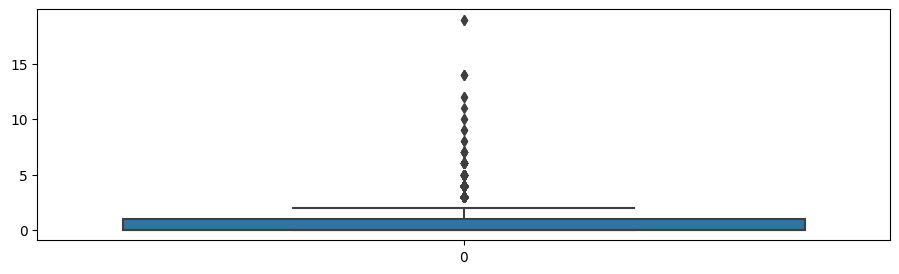

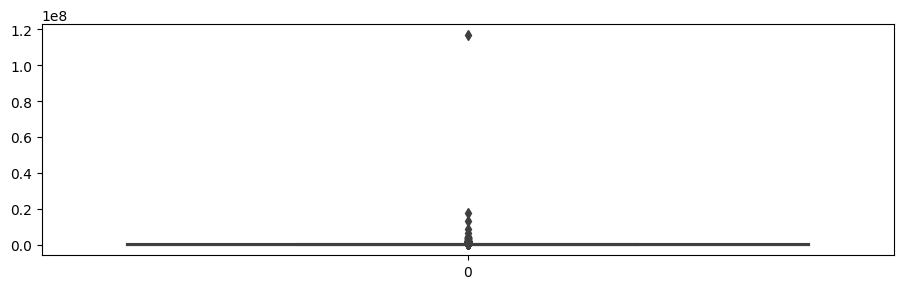

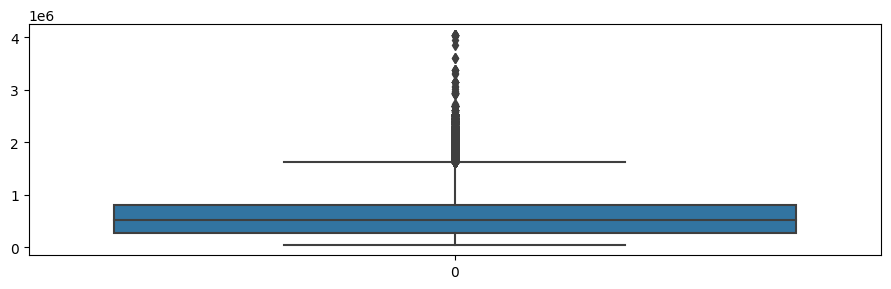

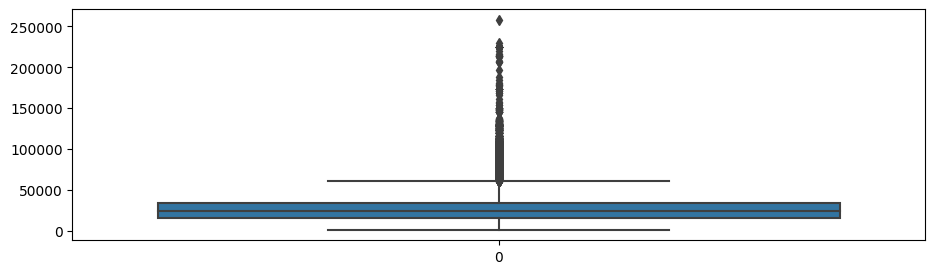

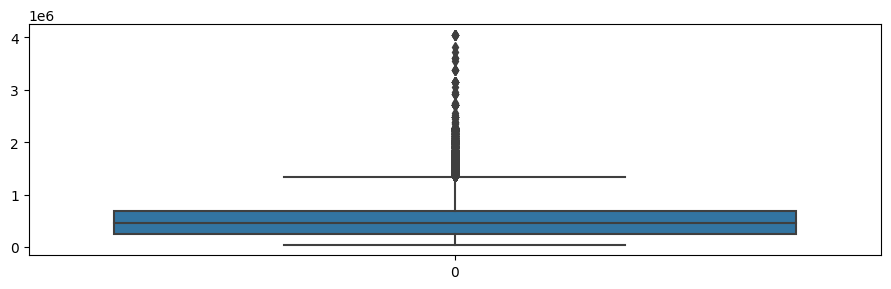

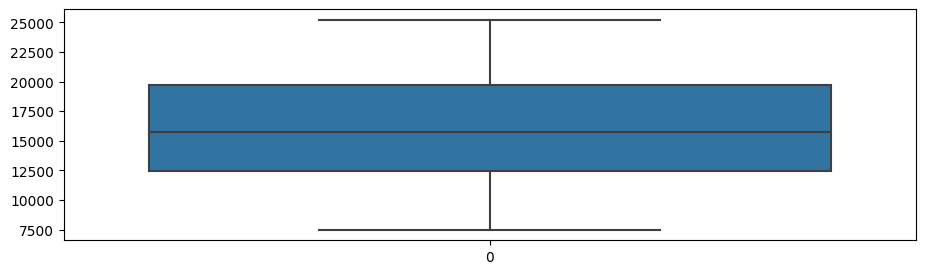

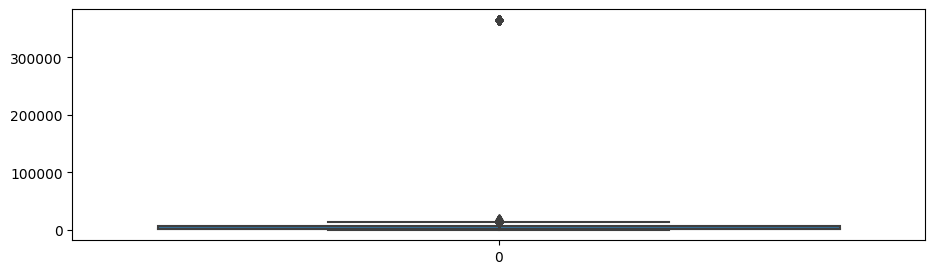

In [51]:
#important columns with outliers(variables)
plt.figure(figsize=(11,3))
sns.boxplot(inp0.CNT_CHILDREN)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_CREDIT)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.DAYS_BIRTH)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp0.DAYS_EMPLOYED)
plt.show()



#### Insight:
 
 From application data we can say that
 - There are certain outliers available in CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE.
 - DAYS_BIRTH column is reliable because there are no outliers in it.
 - AMT_INCOME_TOTAL has many outliers; it means there is a very big difference of income amongst the loan applicants.
 - DAYS_EMPLOYED shows incorrect entry as days employed can not be 350000.

In [52]:
#Handle outliers by using bin
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
#create bins for AMT_INCOME_TOTAL

bins=[0,150000,300000,450000,600000,750000]
binned_category=["Very Low","Low","Medium","High","Very High"]
inp0["AMT_INCOME_RANGE"]=pd.cut(inp0["AMT_INCOME_TOTAL"],bins=bins,labels=binned_category)


In [54]:
inp0.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [55]:
#create bins for AMT_CREDIT
bins=[0,200000,400000,600000,800000,1000000]
binned_category=["Very Low","Low","Medium","High","Very High"]
inp0["AMT_CREDIT_RANGE"]=pd.cut(inp0["AMT_CREDIT"],bins=bins,labels=binned_category)
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,25.920548,20-30,1.745205,0-5,Low,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,1.0,25.553425,20-30,0.646575,0-5,Low,Low
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,1.0,56.917808,50-60,1000.665753,NaN,Very Low,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,1.0,0.0,1.0,41.002740,40-50,21.701370,20-25,Low,High
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,32.769863,30-40,13.112329,10-15,Low,Low


In [56]:
#identify unique entries
inp0.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
EXT_SOURCE_2                   119831
DAYS_BIRTH                      17460
AGE                             17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
EMPLOYMENT_YEARS                12574
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
EXT_SOURCE_3                      814
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
EMPLOYMENT_Y

In [57]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [58]:
#Convert important columns to cateorial column
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [59]:
converted_columns = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
                       "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START",
                       "ORGANIZATION_TYPE","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION"]

for column in converted_columns:
    inp0[column] = pd.Categorical(inp0[column])


In [60]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [61]:
inp0.shape

(307511, 59)

## Dataset2-previous_application

#### Read the dataset


In [62]:
inp1 = pd.read_csv("./prev.csv")
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### checking size of the data


In [63]:
inp1.shape

(1670214, 37)

In [64]:
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [65]:
#Describing the data
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [66]:
#Describing the data
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Insight:
- From the above reading we can get certain details such as we have 1670214 rows and 30 columns.
- There are certain null values and negative values.
- Data cleaning is needed and standardisation of values also needed.

## Data Cleaning

In [67]:
# find null values
null_values=inp1.isnull().sum()
null_values

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Handling missing values


In [68]:
null_values1 = round(inp1.isnull().sum()*100/len(inp1),2)

In [69]:
# identify data with more than 50% missing values
null_values1_50 = null_values1[null_values1>50]
null_values1_50

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64

In [70]:
#Total number of columns with more than 50% missing values
len(null_values1_50)

4

In [71]:
# Removing these 4 columns
null_values1_50.index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [72]:
inp1.drop(columns=null_values1_50.index, inplace=True)
inp1.shape

(1670214, 33)

In [73]:
null_values1 = round(inp1.isnull().sum()*100/len(inp1),2)
null_values1

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [74]:
#Droping columns comprising more than 20% null values other than Occupation_Type
null_values1_20=null_values1[null_values1>20]
null_values1_20

AMT_ANNUITY                  22.29
AMT_GOODS_PRICE              23.08
NAME_TYPE_SUITE              49.12
CNT_PAYMENT                  22.29
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [75]:
inp1[null_values1_20.index]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,NaN,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,Unaccompanied,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,"Spouse, partner",12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1670209,14704.290,267295.5,NaN,30.0,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,6622.020,87750.0,Unaccompanied,12.0,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,11520.855,105237.0,"Spouse, partner",10.0,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,18821.520,180000.0,Family,12.0,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [76]:
# Droping down unnecessary columns
inp1.head(10)
unnec_col1=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START",
       "FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]
inp1.drop(labels=unnec_col1, axis=1,inplace=True)
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
inp1.shape

(1670214, 29)

In [78]:
# Treatment of imp columns
#Treating null values in the column AMT_ANNUITY

inp1.AMT_ANNUITY.isnull().sum()

372235

In [79]:
#Here the data of this column is skewed that is the reason null values are replaced with the median.
amt_annuity_median=inp1.AMT_ANNUITY.median()
amt_annuity_median

11250.0

In [80]:
# Replacing null values with median 
inp1.AMT_ANNUITY.fillna(amt_annuity_median,inplace= True)
inp1.AMT_ANNUITY.value_counts(normalize=True)

11250.000    2.312332e-01
2250.000     1.907839e-02
6750.000     8.048070e-03
9000.000     7.481676e-03
22500.000    7.126632e-03
                 ...     
3794.445     5.987257e-07
8723.160     5.987257e-07
27948.330    5.987257e-07
25374.285    5.987257e-07
14704.290    5.987257e-07
Name: AMT_ANNUITY, Length: 357959, dtype: float64

In [81]:
# Rechecking null values in column AMT_ANNUITY
inp1.AMT_ANNUITY.isnull().sum()

0

In [82]:
inp1.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE              385515
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE              820405
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                  372230
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION            

In [83]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1670214 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            849809 non-null   object 
 13  NAME_CLIENT_

In [84]:
#Treating null values in the column AMT_GOODS_PRICE
inp1.AMT_GOODS_PRICE.isnull().sum()

385515

In [85]:
#Here the data of this column is skewed that is the reason null values are replaced with the median.
amt_goods_price_median=inp1.AMT_ANNUITY.median()
amt_goods_price_median

11250.0

In [86]:
# Replacing null values with median 
inp1.AMT_GOODS_PRICE.fillna(amt_goods_price_median,inplace= True)
inp1.AMT_GOODS_PRICE.value_counts(normalize=True)

11250.000     2.308237e-01
45000.000     2.863765e-02
225000.000    2.607390e-02
135000.000    2.434778e-02
450000.000    2.330600e-02
                  ...     
654250.410    5.987257e-07
117653.850    5.987257e-07
83408.625     5.987257e-07
556677.000    5.987257e-07
267295.500    5.987257e-07
Name: AMT_GOODS_PRICE, Length: 93885, dtype: float64

In [87]:
#Rechecking null values in column AMT_GOODS_PRICE
inp1.AMT_GOODS_PRICE.isnull().sum()

0

In [88]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1670214 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_GOODS_PRICE            1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            849809 non-null   object 
 13  NAME_CLIENT_

In [89]:
#Treating null values in the column CNT_PAYMENT

inp1.CNT_PAYMENT.isnull().sum()

372230

In [90]:
#Here the data of this column is skewed that is the reason null values are replaced with the median.
cnt_payment_median=inp1.CNT_PAYMENT.median()
cnt_payment_median

12.0

In [91]:
# Replacing null values with median 
inp1.CNT_PAYMENT.fillna(cnt_payment_median,inplace= True)
inp1.CNT_PAYMENT.value_counts(normalize=True)

12.0    4.162814e-01
6.0     1.140339e-01
0.0     8.680624e-02
10.0    8.492984e-02
24.0    8.248284e-02
18.0    4.635933e-02
36.0    4.345731e-02
60.0    3.209170e-02
48.0    2.832930e-02
8.0     1.817073e-02
4.0     1.612009e-02
30.0    1.013283e-02
14.0    4.941283e-03
42.0    4.272506e-03
16.0    3.418724e-03
5.0     2.369157e-03
54.0    1.259719e-03
20.0    1.080700e-03
7.0     8.585726e-04
9.0     7.400249e-04
3.0     6.585982e-04
15.0    5.412480e-04
11.0    4.005475e-04
72.0    8.322287e-05
13.0    3.053501e-05
17.0    2.873883e-05
84.0    2.694266e-05
22.0    2.215285e-05
23.0    1.616559e-05
26.0    7.783434e-06
35.0    6.585982e-06
66.0    5.987257e-06
28.0    4.789805e-06
29.0    4.789805e-06
32.0    3.592354e-06
19.0    3.592354e-06
34.0    2.394903e-06
59.0    2.394903e-06
41.0    1.796177e-06
47.0    1.796177e-06
45.0    1.796177e-06
21.0    1.796177e-06
44.0    1.197451e-06
39.0    1.197451e-06
46.0    1.197451e-06
38.0    1.197451e-06
33.0    5.987257e-07
40.0    5.987

In [92]:
inp1.CNT_PAYMENT.isnull().sum()

0

In [93]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Treating null values of column NAME_TYPE_SUITE
inp1.NAME_TYPE_SUITE.describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [95]:
#Unique value is 7 and top value is Unaccompanied so replace null values with it
inp1["NAME_TYPE_SUITE"]=inp1["NAME_TYPE_SUITE"].fillna("Unaccompanied")
#cross check for null values in OCCUPATION_TYPE
inp1["NAME_TYPE_SUITE"].isnull().sum()

0

In [96]:
inp1.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE                   0
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                       0
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION            

In [97]:
#check remaining columns to check standardisation 
column_days1 = ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]
inp1[column_days1].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [98]:
#correcting negative values
inp1[column_days1]=abs(inp1[column_days1])
inp1[column_days1].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017
std,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802
min,2.000000,2.000000,0.000000,2.000000,2.000000
25%,365243.000000,475.000000,257.000000,455.000000,447.000000
50%,365243.000000,921.000000,741.000000,1155.000000,1171.000000
75%,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [99]:
inp1.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE                   0
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                       0
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION            

In [100]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1670214 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_GOODS_PRICE            1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            1670214 non-null  object 
 13  NAME_CLIENT_

In [101]:
# fill null values of remaining important columns
days_installments=["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]

inp1.fillna(inp1[days_installments].median(),inplace=True)        
inp1.isnull().sum()


SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE                   0
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                       0
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING                0
DAYS_FIRST_DUE                    0
DAYS_LAST_DUE_1ST_VERSION         0
DAYS_LAST_DUE                     0
DAYS_TERMINATION            

In [102]:
# fill null values of remaining important columns

inp1.NFLAG_INSURED_ON_APPROVAL.fillna(0,inplace=True)        
inp1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMINATION               0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int64

### Outlier Handling

In [103]:
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.778528e+05,-8.806797e+02,3.139511e+02,1.515057e+01,3.515695e+05,9.893131e+03,2.129179e+04,4.712409e+04,5.032640e+04,1.985506e-01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.912793e+05,7.790997e+02,7.127443e+03,1.295220e+01,6.923193e+04,5.612401e+04,8.393241e+04,1.210419e+05,1.245493e+05,3.989090e-01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,1.872000e+04,-1.300000e+03,-1.000000e+00,1.000000e+01,3.652430e+05,7.520000e+02,5.360000e+02,8.730000e+02,8.760000e+02,0.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,-5.810000e+02,3.000000e+00,1.200000e+01,3.652430e+05,9.210000e+02,7.410000e+02,1.155000e+03,1.171000e+03,0.000000e+00
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,-2.800000e+02,8.200000e+01,1.600000e+01,3.652430e+05,1.132000e+03,9.960000e+02,1.518000e+03,1.544000e+03,0.000000e+00
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00,4.000000e+06,8.400000e+01,3.652430e+05,3.652430e+05,3.652430e+05,3.652430e+05,3.652430e+05,1.000000e+00


#### With the help of description we can identify columns that contain outliers as it will provide a difference between max and different percentile.


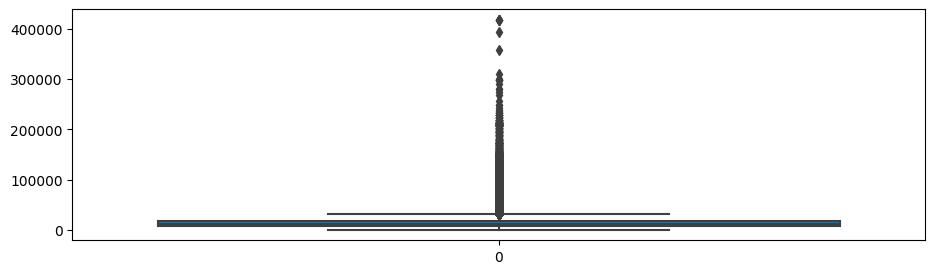

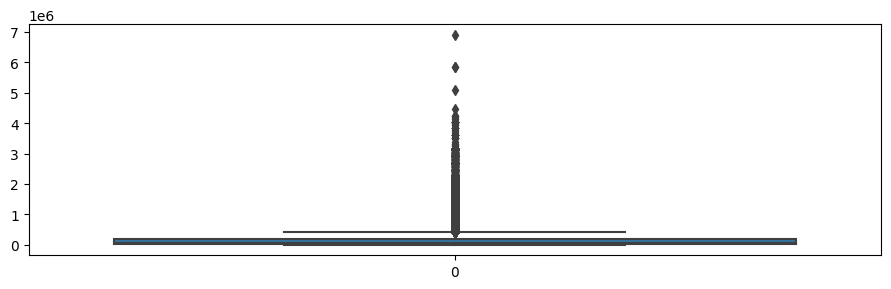

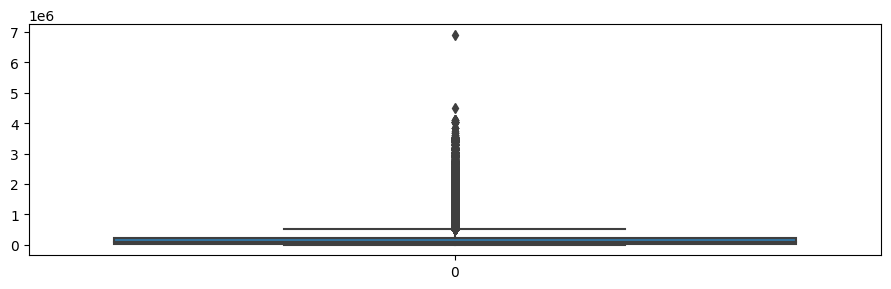

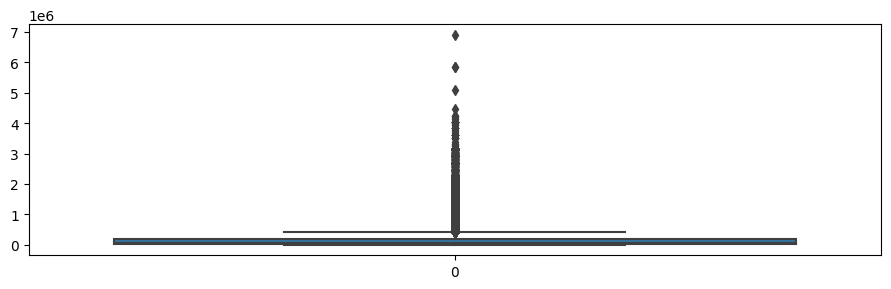

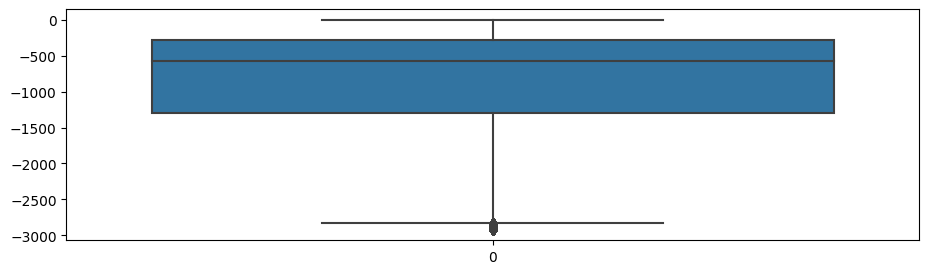

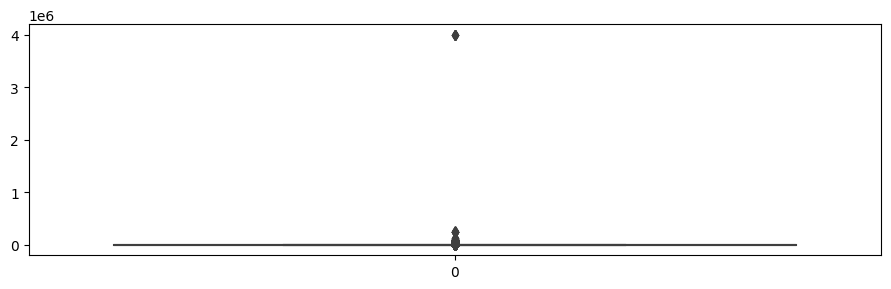

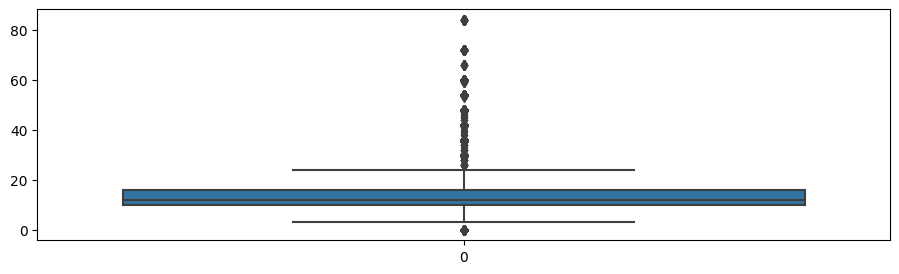

In [104]:
#important columns with outliers(variables)
plt.figure(figsize=(11,3))
sns.boxplot(inp1.AMT_ANNUITY)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp1.AMT_APPLICATION)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp1.AMT_CREDIT)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp1.AMT_GOODS_PRICE)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp1.DAYS_DECISION)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp1.SELLERPLACE_AREA)
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(inp1.CNT_PAYMENT)
plt.show()

#### Insight:
From application data we can say that

- There are huge numbers of outliers available in AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT.
- DAYS_DECISION has few numbers of outliers.
- SELLERPLACE_AREA has also, outliers in high numbers.

In [105]:
#create bins for AMT_APPLICATION

bins=[0,150000,300000,450000,600000,750000]
binned_category=["Very Low","Low","Medium","High","Very High"]
inp1["AMT_APPLICATION_RANGE"]=pd.cut(inp1["AMT_APPLICATION"],bins=bins,labels=binned_category)

In [106]:
inp1.AMT_APPLICATION.head()

0     17145.0
1    607500.0
2    112500.0
3    450000.0
4    337500.0
Name: AMT_APPLICATION, dtype: float64

In [107]:
#identify unique entries
inp1.nunique().sort_values(ascending=False)

SK_ID_PREV                   1670214
AMT_ANNUITY                   357959
SK_ID_CURR                    338857
AMT_APPLICATION                93885
AMT_GOODS_PRICE                93885
AMT_CREDIT                     86803
DAYS_DECISION                   2922
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE                   2873
DAYS_FIRST_DRAWING              2838
DAYS_TERMINATION                2830
DAYS_LAST_DUE_1ST_VERSION       2803
SELLERPLACE_AREA                2097
CNT_PAYMENT                       49
NAME_GOODS_CATEGORY               28
NAME_CASH_LOAN_PURPOSE            25
PRODUCT_COMBINATION               17
NAME_SELLER_INDUSTRY              11
CODE_REJECT_REASON                 9
CHANNEL_TYPE                       8
NAME_TYPE_SUITE                    7
NAME_PORTFOLIO                     5
NAME_YIELD_GROUP                   5
AMT_APPLICATION_RANGE              5
NAME_CLIENT_TYPE                   4
NAME_PAYMENT_TYPE                  4
NAME_CONTRACT_STATUS               4
N

In [108]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  object  
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object  
 8   NAME_CONTRACT_STATUS       1670214 non-null  object  
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  object  
 11  CODE_REJECT_REASON         1670214 non-null  object  
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

In [109]:
#Convert important columns to cateorial column
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'AMT_APPLICATION_RANGE'],
      dtype='object')

In [110]:
converted_columns1 = ["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]                    
    
for column in converted_columns1:
    inp1[column] = pd.Categorical(inp1[column])

In [111]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  object  
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  category
 8   NAME_CONTRACT_STATUS       1670214 non-null  category
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  category
 11  CODE_REJECT_REASON         1670214 non-null  category
 12  NAME_TYPE_SUITE            1670214 non-null  category
 1

In [112]:
inp1.shape

(1670214, 30)

#### ANALYSIS

##### Checking imbalance percentage


In [113]:
inp0["TARGET"].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

- There is data imbalance in TARGET
Repayer percentage is 91.93(Approx).
Defaulter percentage is 8.07(Approx).

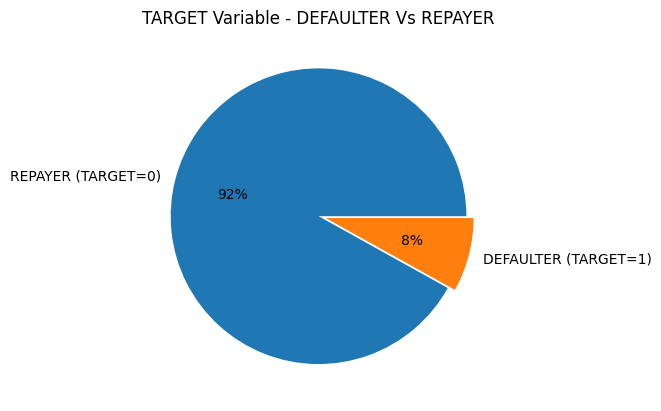

In [114]:
plt.pie(inp0["TARGET"].value_counts(normalize=True)*100,labels=["REPAYER (TARGET=0)","DEFAULTER (TARGET=1)"],explode=(0,0.05),autopct="%1.f%%")
plt.title("TARGET Variable - DEFAULTER Vs REPAYER")
plt.show()                                                                

#### Univariate analysis- categorical feautures


In [115]:
# Divinding TARGET variable into two parts target_1 is REPAYER and target_2 is DEFAULTER

target_0 = inp0[inp0["TARGET"]==0]
target_1 = inp0[inp0["TARGET"]==1]

In [116]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,1.0,1.0,46.413699,40-50,4.350685,0-5,Very Low,Medium


In [117]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,25.920548,20-30,1.745205,0-5,Low,Medium
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,0.0,2.0,2.0,51.298630,50-60,7.200000,5-10,Very Low,Very High
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,2.0,0.0,4.0,47.895890,40-50,3.457534,0-5,Low,NaN
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,0.0,0.0,2.0,36.668493,30-40,9.854795,5-10,Very Low,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0.0,0.0,0.0,0.0,67.928767,60 Above,1000.665753,NaN,Very Low,Low


#### Univariate Analysis for REPAYER and DEFAULTER for numeric variables

In [118]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#### Age

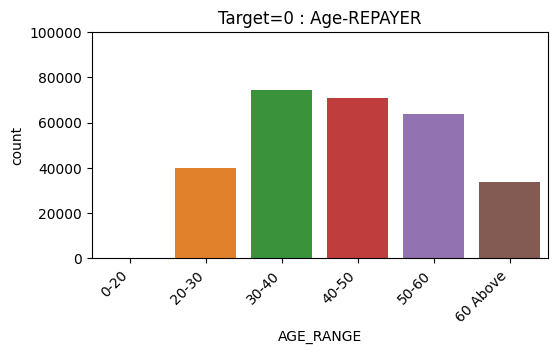

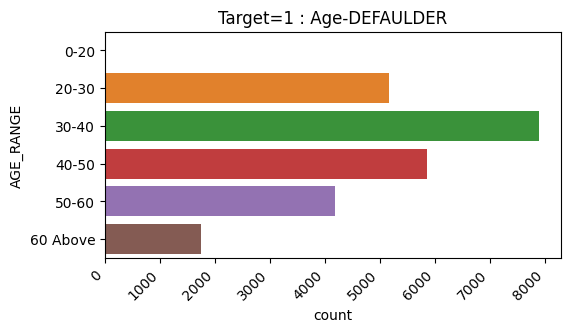

In [131]:
#Creating plots for Age_range for REPAYER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : Age-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["AGE_RANGE"])
plt.show()


#Creating plots for Age_range for DEFAULTER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=1 : Age-DEFAULDER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["AGE_RANGE"])
plt.show()


######  Insights:
- Age range between 30 to 40 can be able to pay their loan on time also, by considering other factors age range 40-50 can be considered to provide a loan.
- Also, with the same Age range these applicants are riskiest people to lend a loan.With increasing age defaulters are decreases.

#### Employment years range

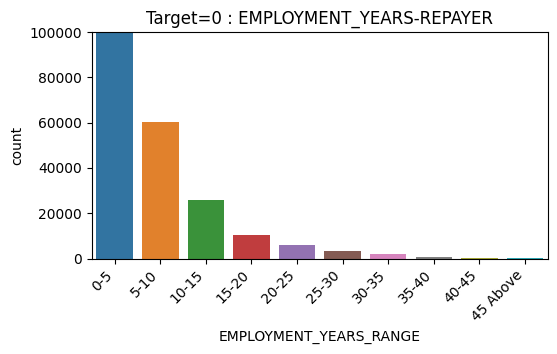

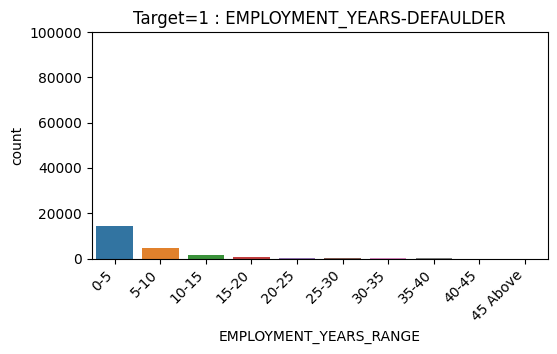

In [134]:
#Creating plots for Employment_years_range for REPAYER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : EMPLOYMENT_YEARS-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["EMPLOYMENT_YEARS_RANGE"])
plt.show()


#Creating plots for Employment_years_range for DEFAULTER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=1 : EMPLOYMENT_YEARS-DEFAULDER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["EMPLOYMENT_YEARS_RANGE"])
plt.show()


##### Insights:
- Applicants between 0-5 years Employment years are highest repayers.
- It is similar in Defaultees also. approx 10% applicants are defaultees from 0-5 years employment range which is gradually decreasing with increasing years.

#### Amt credit range

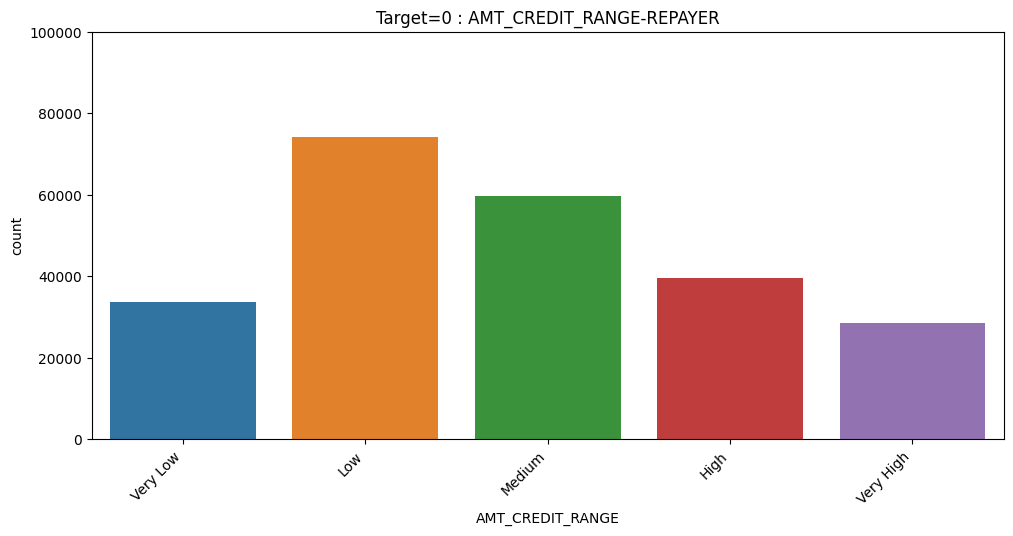

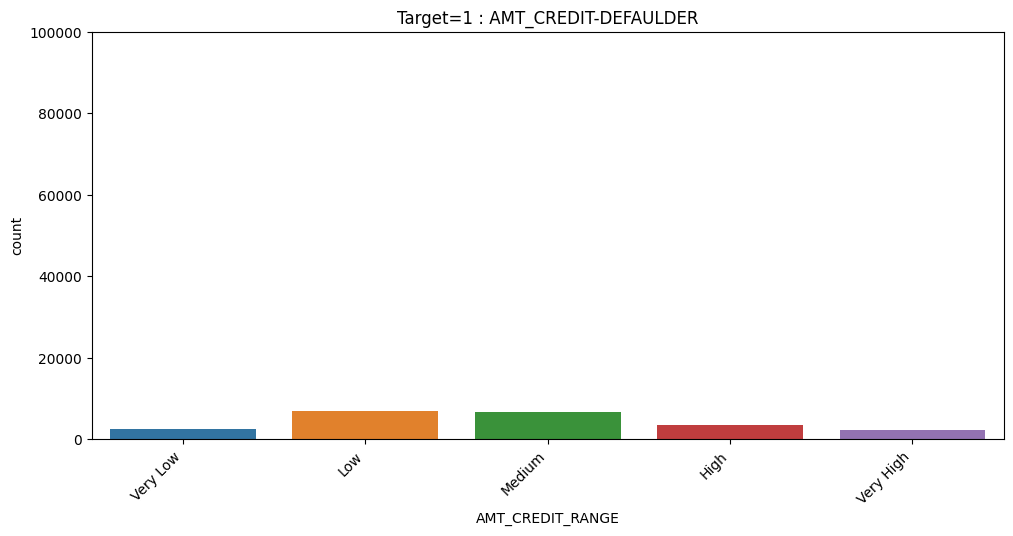

In [136]:
#Creating plots for Amt_credit_range for REPAYER
plt.figure(figsize = (40,18))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : AMT_CREDIT_RANGE-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["AMT_CREDIT_RANGE"])
plt.show()


#Creating plots for Amt_credit_range for DEFAULTER
plt.figure(figsize = (40,18))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=1 : AMT_CREDIT-DEFAULDER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["AMT_CREDIT_RANGE"])
plt.show()


##### Insights:
- From the observation Low is most repaid range of credit.
- Medium credit range is including highest defaulters.



#### Categorical Variables

#### Name contract type

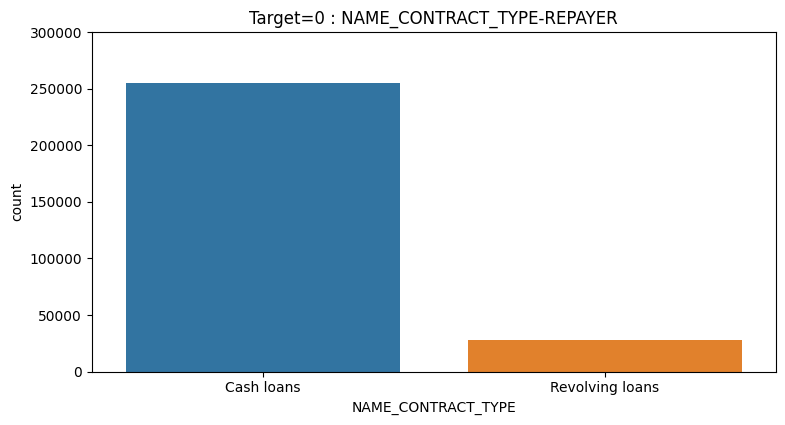

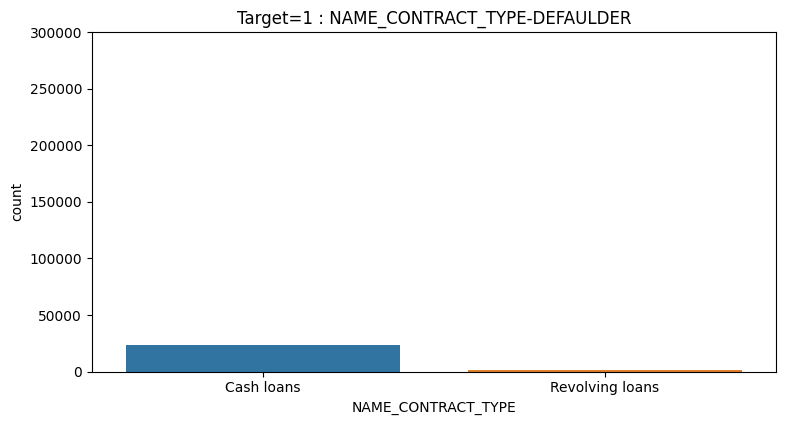

In [138]:
#Creating plots for REPAYER
plt.figure(figsize = (30,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=0 : NAME_CONTRACT_TYPE-REPAYER")
sns.countplot(x=target_0["NAME_CONTRACT_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (30,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=1 : NAME_CONTRACT_TYPE-DEFAULDER")
sns.countplot(x=target_1["NAME_CONTRACT_TYPE"])
plt.show()


#### Insights:
- Revolving loans are very small part of total loans.
- Very few loan applicants are defaulter in revolving loans.



#### Code Gender

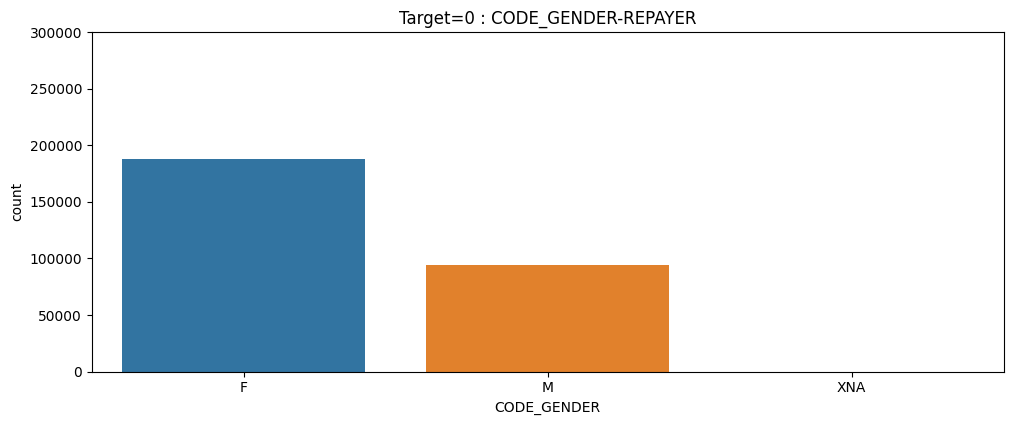

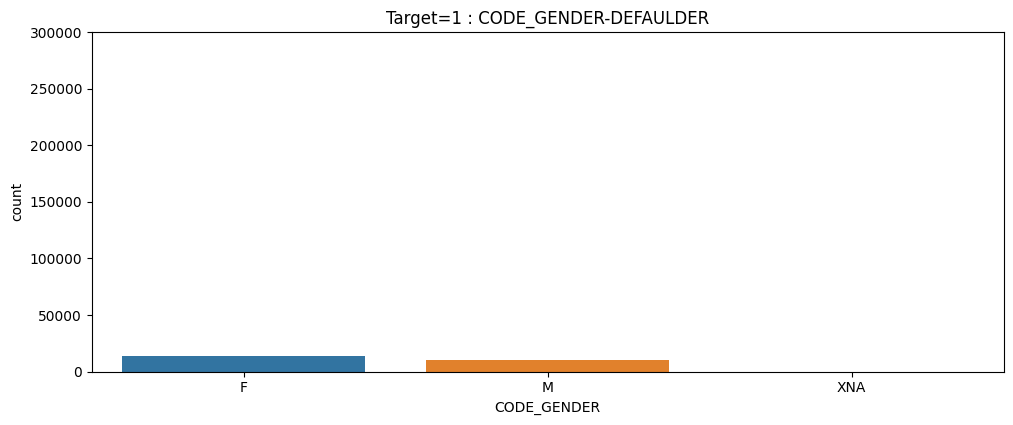

In [140]:
#Creating plots for REPAYER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=0 : CODE_GENDER-REPAYER")
sns.countplot(x=target_0["CODE_GENDER"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=1 : CODE_GENDER-DEFAULDER")
sns.countplot(x=target_1["CODE_GENDER"])
plt.show()


###### Insights:
- Males clients have a highest chances to being a defaulter.
- Female clients are highest repayers of loans.

#### Flag own realty

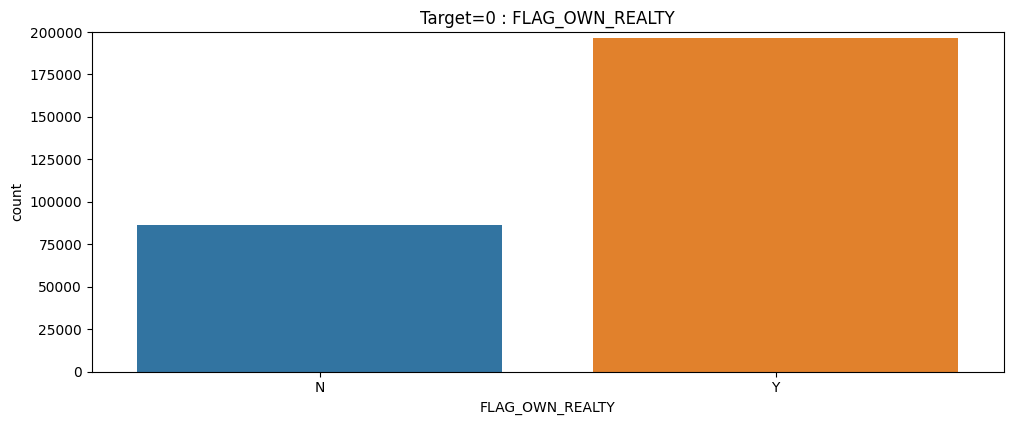

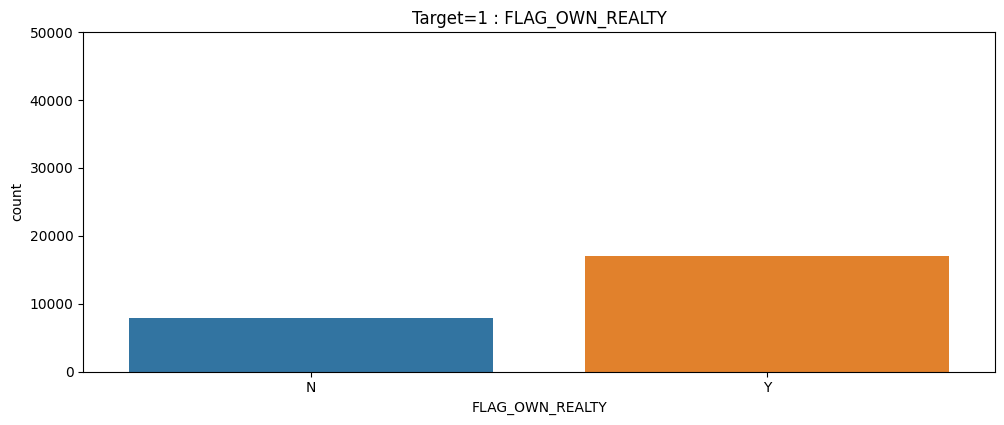

In [142]:
#Creating plots for REPAYER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,200000)
plt.title("Target=0 : FLAG_OWN_REALTY")
sns.countplot(x=target_0["FLAG_OWN_REALTY"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (40,15))
plt.subplot(3, 3, 2)
plt.ylim(0,50000)
plt.title("Target=1 : FLAG_OWN_REALTY")
sns.countplot(x=target_1["FLAG_OWN_REALTY"])
plt.show()

###### Insights:
- The number of clients are almost double who are into real estate.
- The defaulter's rate is also higher from the same group.


#### Name Income Type

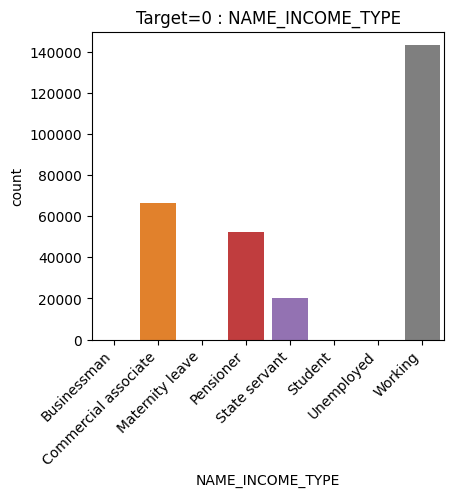

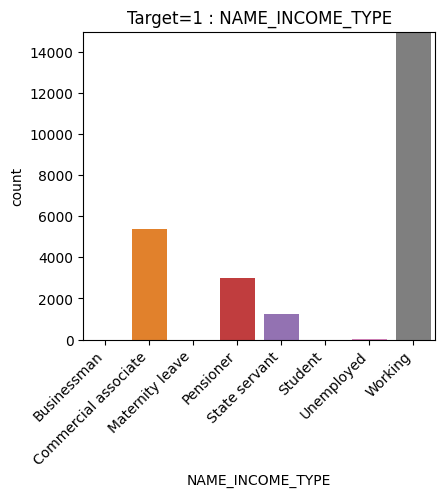

In [144]:
#Creating plots for REPAYER
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
plt.ylim(0,150000)
plt.title("Target=0 : NAME_INCOME_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["NAME_INCOME_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (10,4))
plt.subplot(1,2,2)
plt.ylim(0,15000)
plt.title("Target=1 : NAME_INCOME_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["NAME_INCOME_TYPE"])
plt.show()

###### Insights:
- Students,Unemployed are not defaulter.It may be possible that students do not need to pay when they are students and unemploed 's loan can not be granted.
- Commercial associates are highest repayer and defaulder as well.

#### Name Family Status

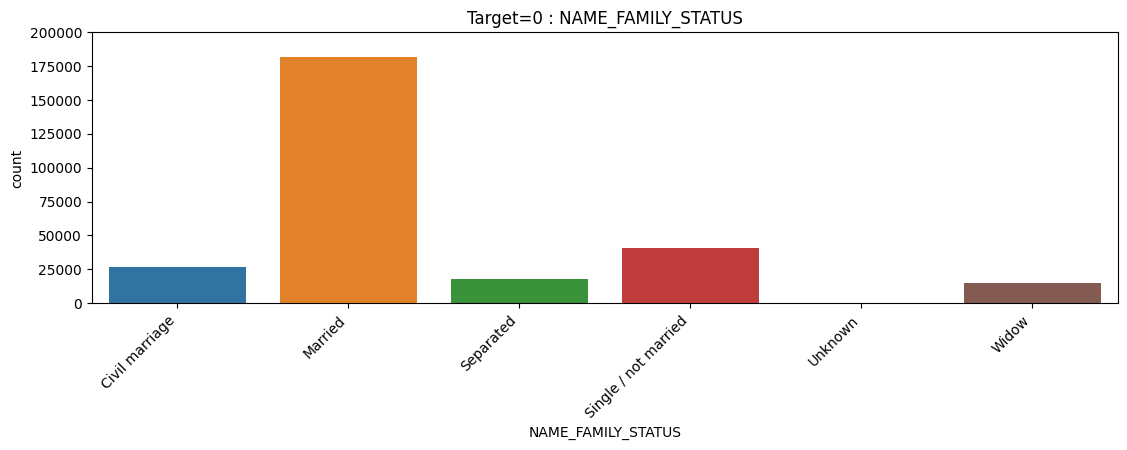

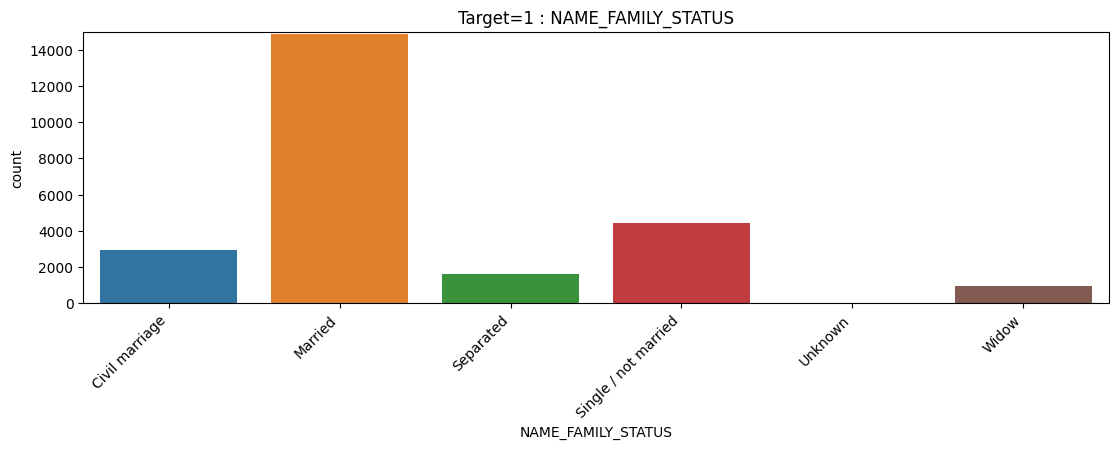

In [146]:
#Creating plots for REPAYER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,200000)
plt.title("Target=0 : NAME_FAMILY_STATUS")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["NAME_FAMILY_STATUS"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,15000)
plt.title("Target=1 : NAME_FAMILY_STATUS")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["NAME_FAMILY_STATUS"])
plt.show()

###### Insights:
- Married people are applying for loans as compare to others.
- There is more risk to lend them loan too as they are more likely to be defaulter.

#### Name Housing Type

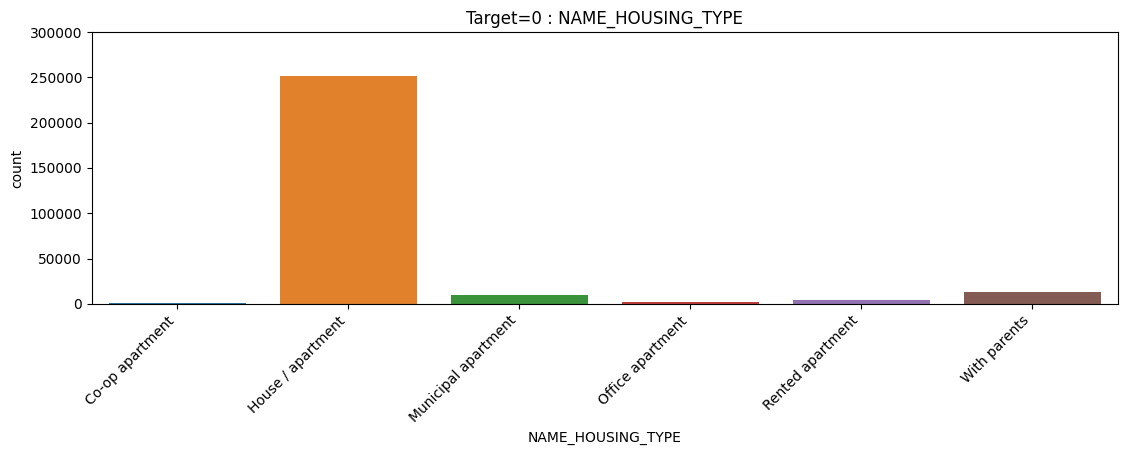

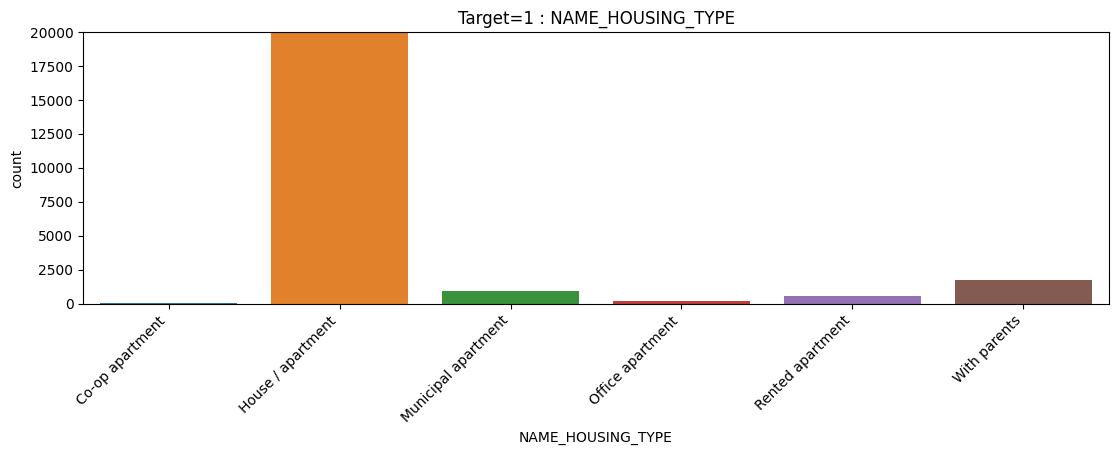

In [148]:
#Creating plots for REPAYER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,300000)
plt.title("Target=0 : NAME_HOUSING_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["NAME_HOUSING_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (45,12))
plt.subplot(3, 3, 2)
plt.ylim(0,20000)
plt.title("Target=1 : NAME_HOUSING_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["NAME_HOUSING_TYPE"])
plt.show()

###### Insights:
- Most of the people applied for the loan are living in the House/appartment.
- Very less number of loan applicants are living in co-op -apartment or office appartment.
- Office apparment 's loan applicants have lowest default rate.

#### Occupation Type

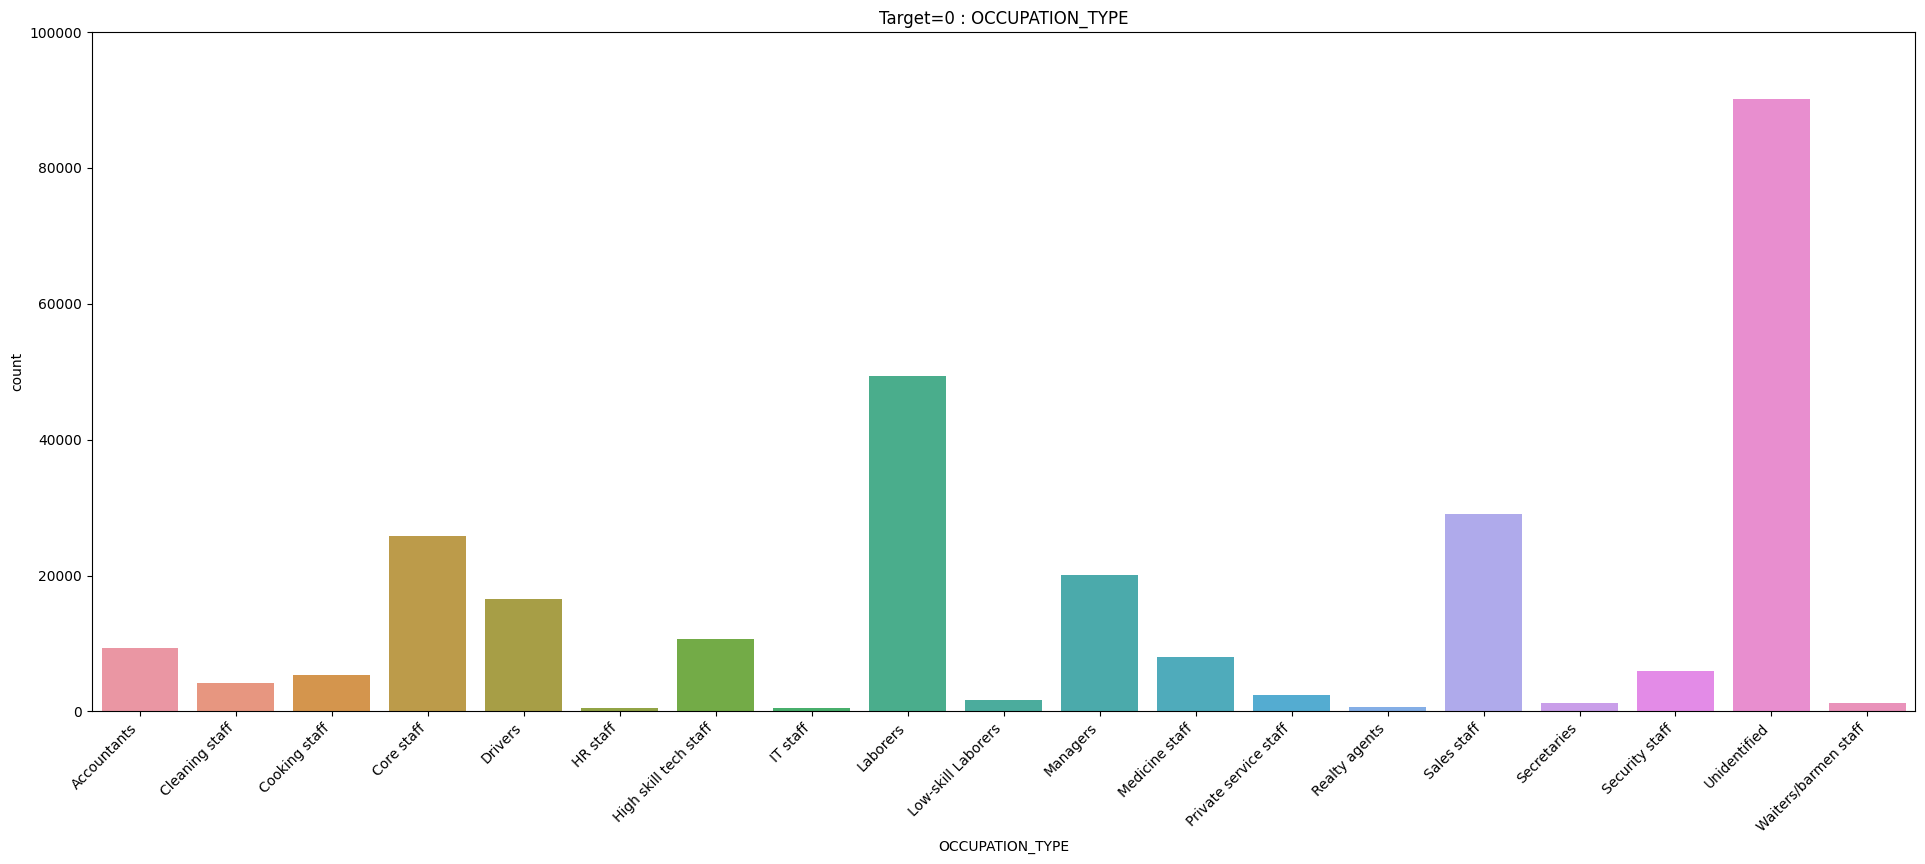

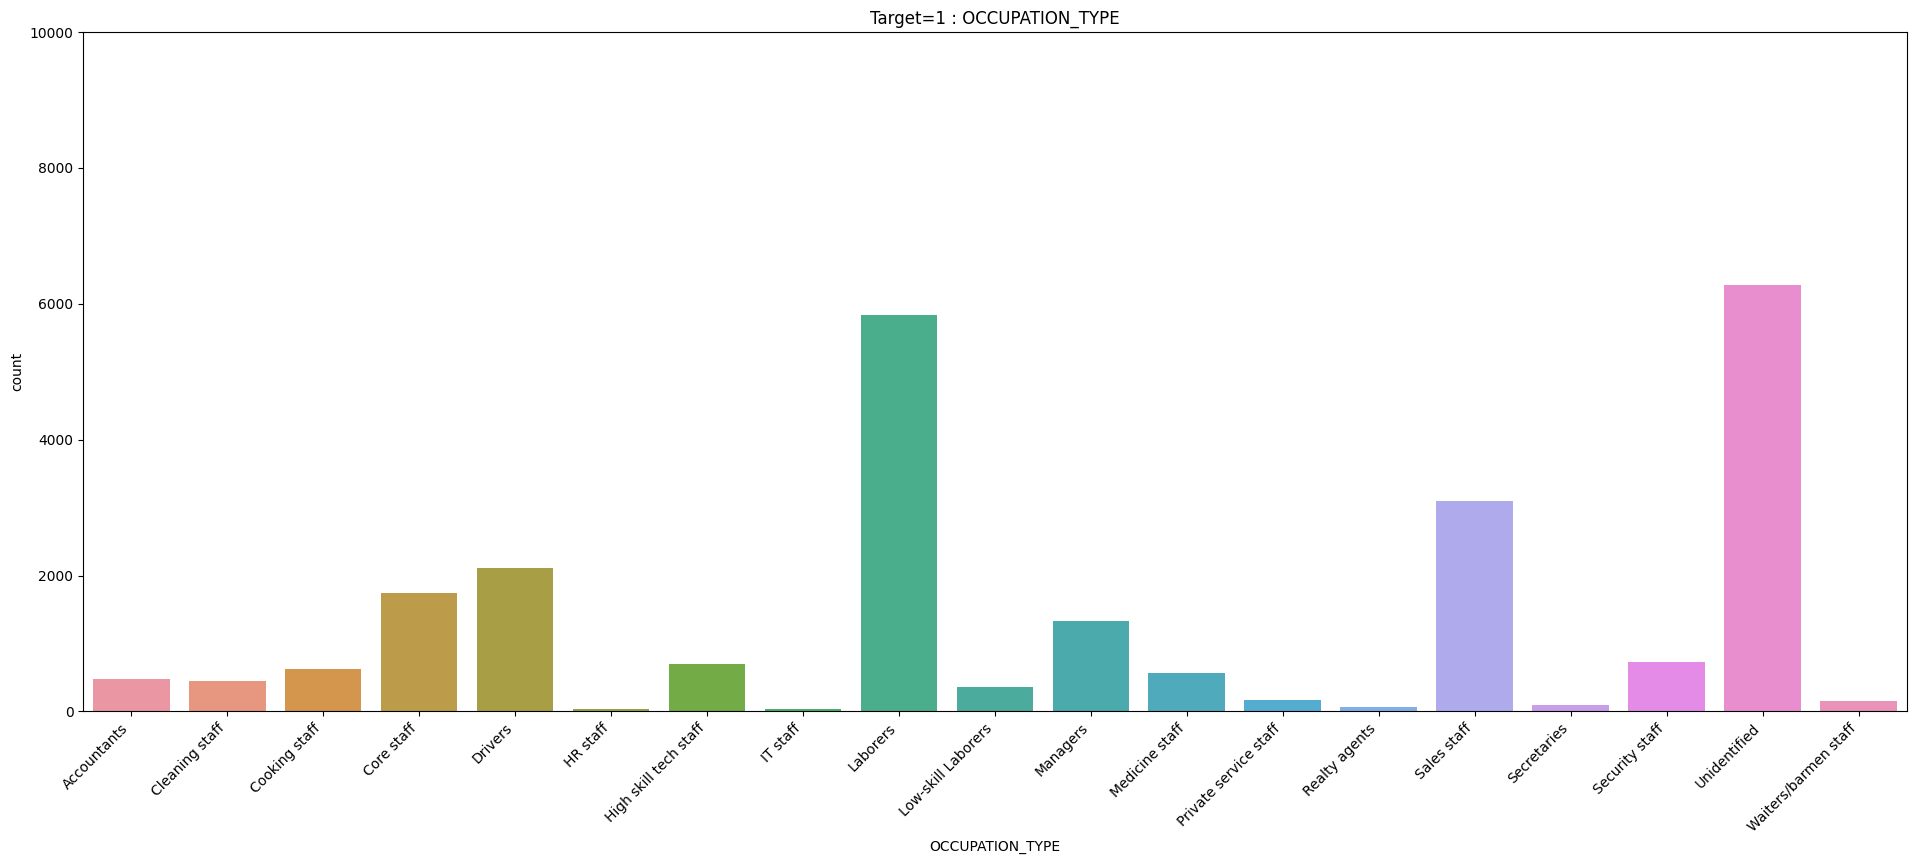

In [150]:
#Creating plots for REPAYER
plt.figure(figsize = (80,30))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : OCCUPATION_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_0["OCCUPATION_TYPE"])
plt.show()


#Creating plots for DEFAULTER
plt.figure(figsize = (80,30))
plt.subplot(3, 3, 2)
plt.ylim(0,10000)
plt.title("Target=1 : OCCUPATION_TYPE")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=target_1["OCCUPATION_TYPE"])
plt.show()

###### Insights:
- Labourers and Sales staff are highest applicants of loan and defaultees too.
- IT staff, HR Staff are less in numbers of applicants of loan.


### Categorical Bivariate or Multivariate Analysis

In [151]:
inp0.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].describe()


,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685943,25650.0,112500.0,135000.0,202500.0,117000000.0


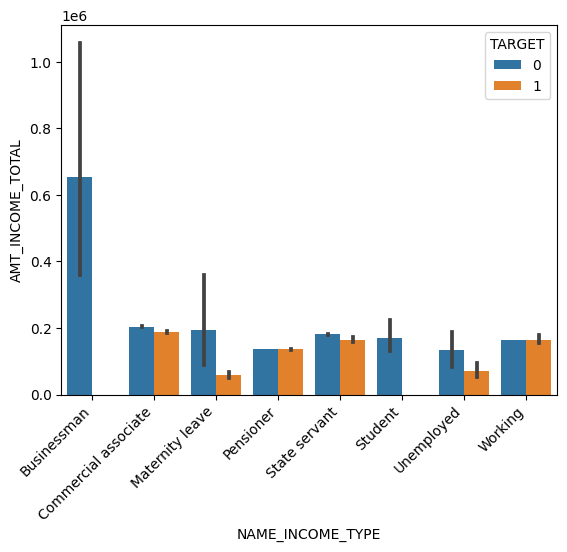

In [152]:
sns.barplot(x="NAME_INCOME_TYPE",y="AMT_INCOME_TOTAL",hue="TARGET",data=inp0) 
plt.xticks(rotation=45, ha='right')
plt.show()


###### Insights:
- Businessman 's income range is highest and that is why Repayer rate is higher in them.
- Commercial associate, state servant, working  's defaulter rate is higher in the given data.


#### checking correlation

In [153]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [154]:
cols_correlation1 = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY", 
                        "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", 
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", 
                        "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT",
                        "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START",
                        "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                        "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
                        "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

target_0_col=inp0.loc[inp0['TARGET']==0, cols_correlation1]
target_1_col=inp0.loc[inp0['TARGET']==1, cols_correlation1]


In [155]:
len(cols_correlation1)

43

In [156]:
target_0.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_RANGE,EMPLOYMENT_YEARS,EMPLOYMENT_YEARS_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,Low,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,52.180822,50-60,0.616438,0-5,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,52.068493,50-60,8.326027,5-10,Very Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,54.608219,50-60,8.323288,5-10,Very Low,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,1.0,1.0,46.413699,40-50,4.350685,0-5,Very Low,Medium
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,1.0,1.0,2.0,37.747945,30-40,8.575342,5-10,Low,NaN
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,51.643836,50-60,1.230137,0-5,Medium,NaN
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,1.0,55.065753,50-60,1000.665753,NaN,Very Low,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,1.0,39.641096,30-40,5.531507,5-10,Very Low,Medium
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0.0,1.0,0.0,0.0,27.936986,20-30,1.860274,0-5,Very Low,High


In [157]:
#checking correlation amongst the variable for target_0
corr0=target_0_col.corr()
corr0=corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,...,-0.002193,0.014199,-0.002125,0.008501,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.035861
AMT_INCOME_TOTAL,NaN,NaN,0.342799,0.418949,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,...,-0.027998,-0.028507,-0.027897,0.041338,0.002707,0.008029,0.008647,0.058682,0.017676,0.034384
AMT_CREDIT,NaN,NaN,NaN,0.771297,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,...,-0.019433,-0.000180,-0.021859,0.069540,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.037519
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.776674,0.120983,-0.012262,-0.104978,-0.039434,-0.014113,...,-0.022162,-0.012280,-0.023053,0.062012,0.003220,0.002464,0.012384,0.036293,0.011660,-0.008009
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.103827,0.044565,-0.068609,-0.015916,0.003649,...,-0.020746,-0.000277,-0.022923,0.071373,-0.001703,0.005507,0.001176,0.056649,0.022122,-0.039815
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,0.025244,-0.007198,0.052083,0.001071,...,0.005409,-0.012493,0.001808,0.041164,-0.002334,0.001629,-0.002814,0.071495,-0.001954,0.000152
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626114,0.333151,0.271314,...,0.003141,-0.007132,0.001065,0.076510,-0.002926,-0.001587,0.003570,0.001871,0.015427,0.073352
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214511,0.276663,...,0.019395,0.007531,0.016398,-0.023379,-0.004292,-0.000932,0.001741,-0.032821,0.013322,0.046890
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100236,...,-0.001209,-0.008224,-0.002645,0.053533,0.002514,0.000009,0.001268,0.010877,0.000363,0.024278
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000335,0.012902,-0.002429,0.082949,-0.001943,0.002199,0.006943,0.017382,0.017089,0.047551


In [158]:
#checking correlation of top 10
corr0_inp0 = corr0.unstack().reset_index()
corr0_inp0.columns=["VAR1","VAR2","Correlation"]
corr0_inp0.dropna(subset = ["Correlation"], inplace = True)
corr0_inp0["Correlation"] = round(corr0_inp0["Correlation"], 2)
corr0_inp0["Correlation"] = corr0_inp0["Correlation"].abs()
corr0_inp0.sort_values(by = "Correlation", ascending = False).head(10)


,VAR1,VAR2,Correlation
598,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
118,AMT_GOODS_PRICE,AMT_CREDIT,0.99
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
290,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
628,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
509,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
89,AMT_ANNUITY,AMT_CREDIT,0.77
209,DAYS_EMPLOYED,DAYS_BIRTH,0.63
324,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54


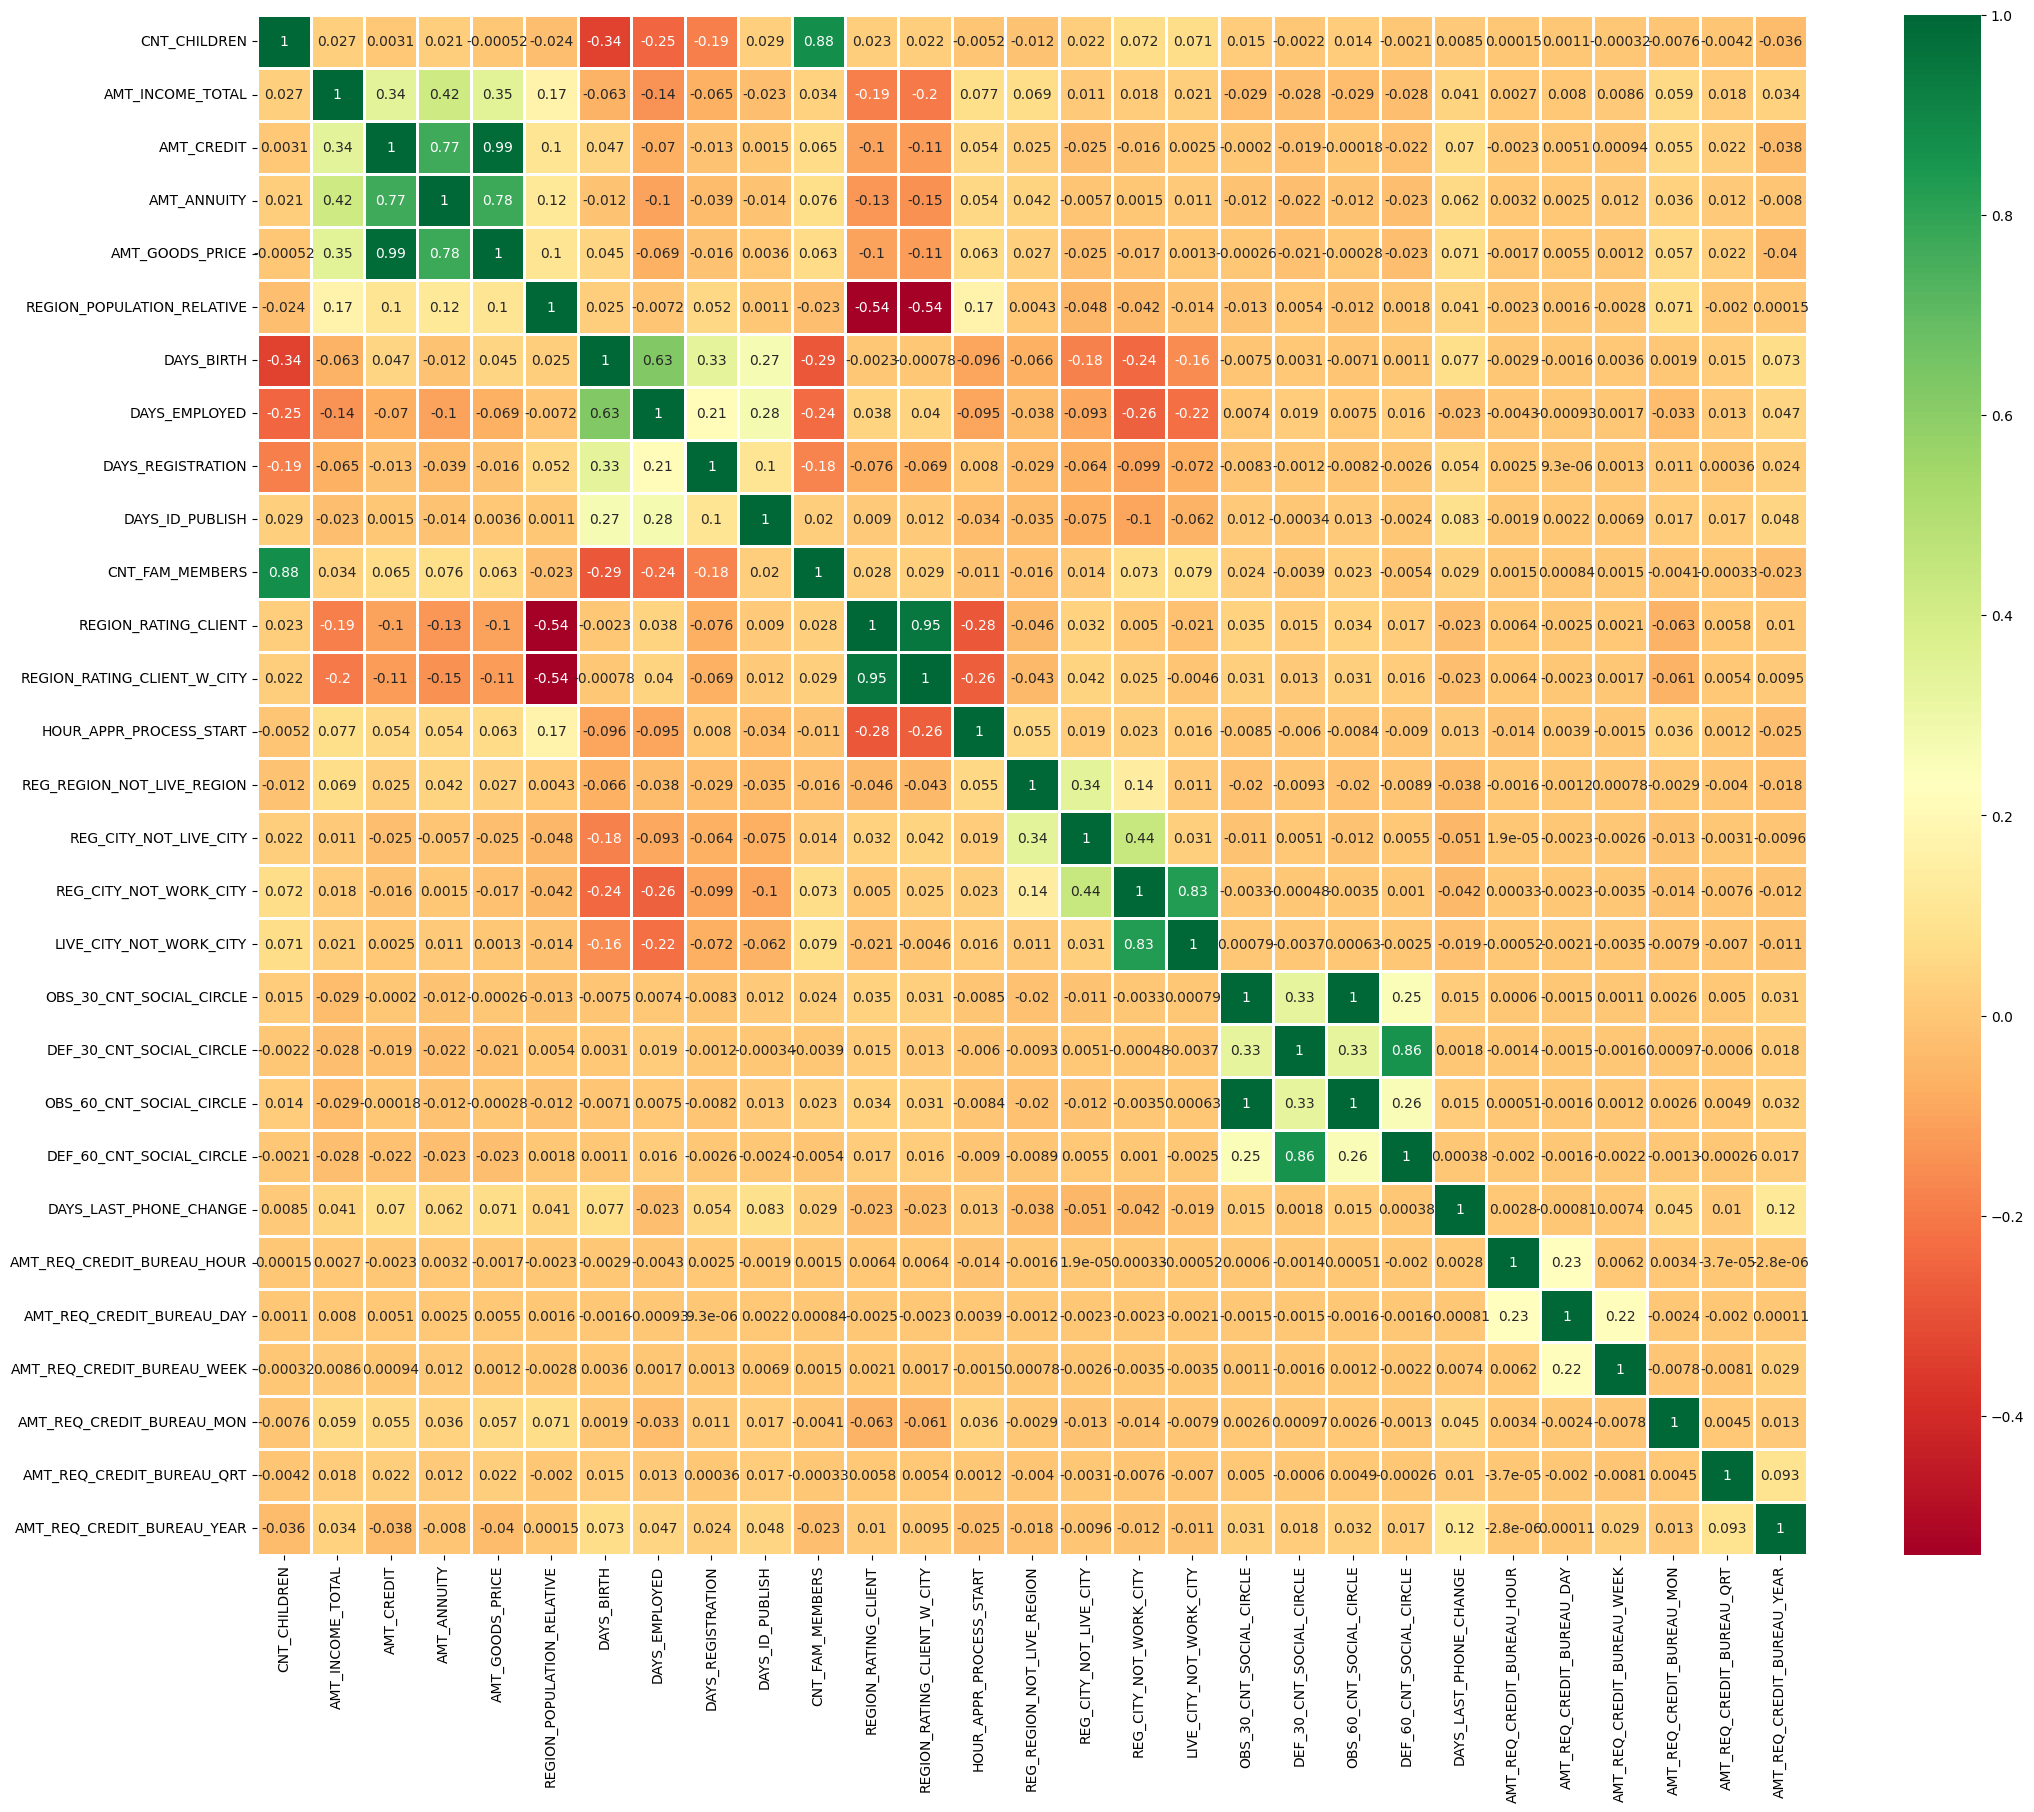

In [159]:
# Plotting heatmao to visualise correlation among repyers
fig = plt.figure(figsize=(25,20))
ax = sns.heatmap(target_0_col.corr(), cmap="RdYlGn",annot=True,linewidth =1)

#### Insights:
- There is very high relationship between credit amount,goods price amount,amt annuity and total income.
- There is also high relationship between Days birth and days employed.
- CNT Children and family members also shares high relationship.

In [160]:
#checking correlation amongst the variable for target_0
corr1=target_1_col.corr()
corr1=corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,NaN,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,...,0.001520,0.025285,-0.005039,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,NaN,NaN,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,-0.000158,0.004215,...,-0.005170,-0.004588,-0.004852,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,NaN,NaN,NaN,0.752195,0.983103,0.069161,0.135316,0.001930,0.025854,0.052329,...,-0.025503,0.020242,-0.030461,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.752699,0.071690,0.014303,-0.081207,-0.034279,0.016767,...,-0.021794,0.006465,-0.026966,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.076049,0.135810,0.006642,0.025679,0.056086,...,-0.021380,0.021028,-0.025826,0.118303,-0.002459,0.005450,0.010777,0.059103,-0.006120,-0.022840
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,0.048190,0.015532,0.056222,0.015537,...,0.025824,0.006741,0.018199,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582185,0.289114,0.252863,...,-0.004939,0.005388,-0.003994,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192455,0.229090,...,0.003066,-0.008498,0.005280,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096833,...,-0.010332,-0.014577,-0.009185,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.007448,0.019823,-0.004813,0.123951,-0.000481,0.014249,0.003732,0.024159,0.007979,0.056391


In [161]:
#checking correlation of top 10
corr1_inp0 = corr1.unstack().reset_index()
corr1_inp0.columns=["VAR1","VAR2","Correlation"]
corr1_inp0.dropna(subset = ["Correlation"], inplace = True)
corr1_inp0["Correlation"] = round(corr1_inp0["Correlation"], 2)
corr1_inp0["Correlation"] = corr1_inp0["Correlation"].abs()
corr1_inp0.sort_values(by = "Correlation", ascending = False).head(10)

,VAR1,VAR2,Correlation
598,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
118,AMT_GOODS_PRICE,AMT_CREDIT,0.98
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
290,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
628,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
509,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
89,AMT_ANNUITY,AMT_CREDIT,0.75
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
209,DAYS_EMPLOYED,DAYS_BIRTH,0.58
479,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47


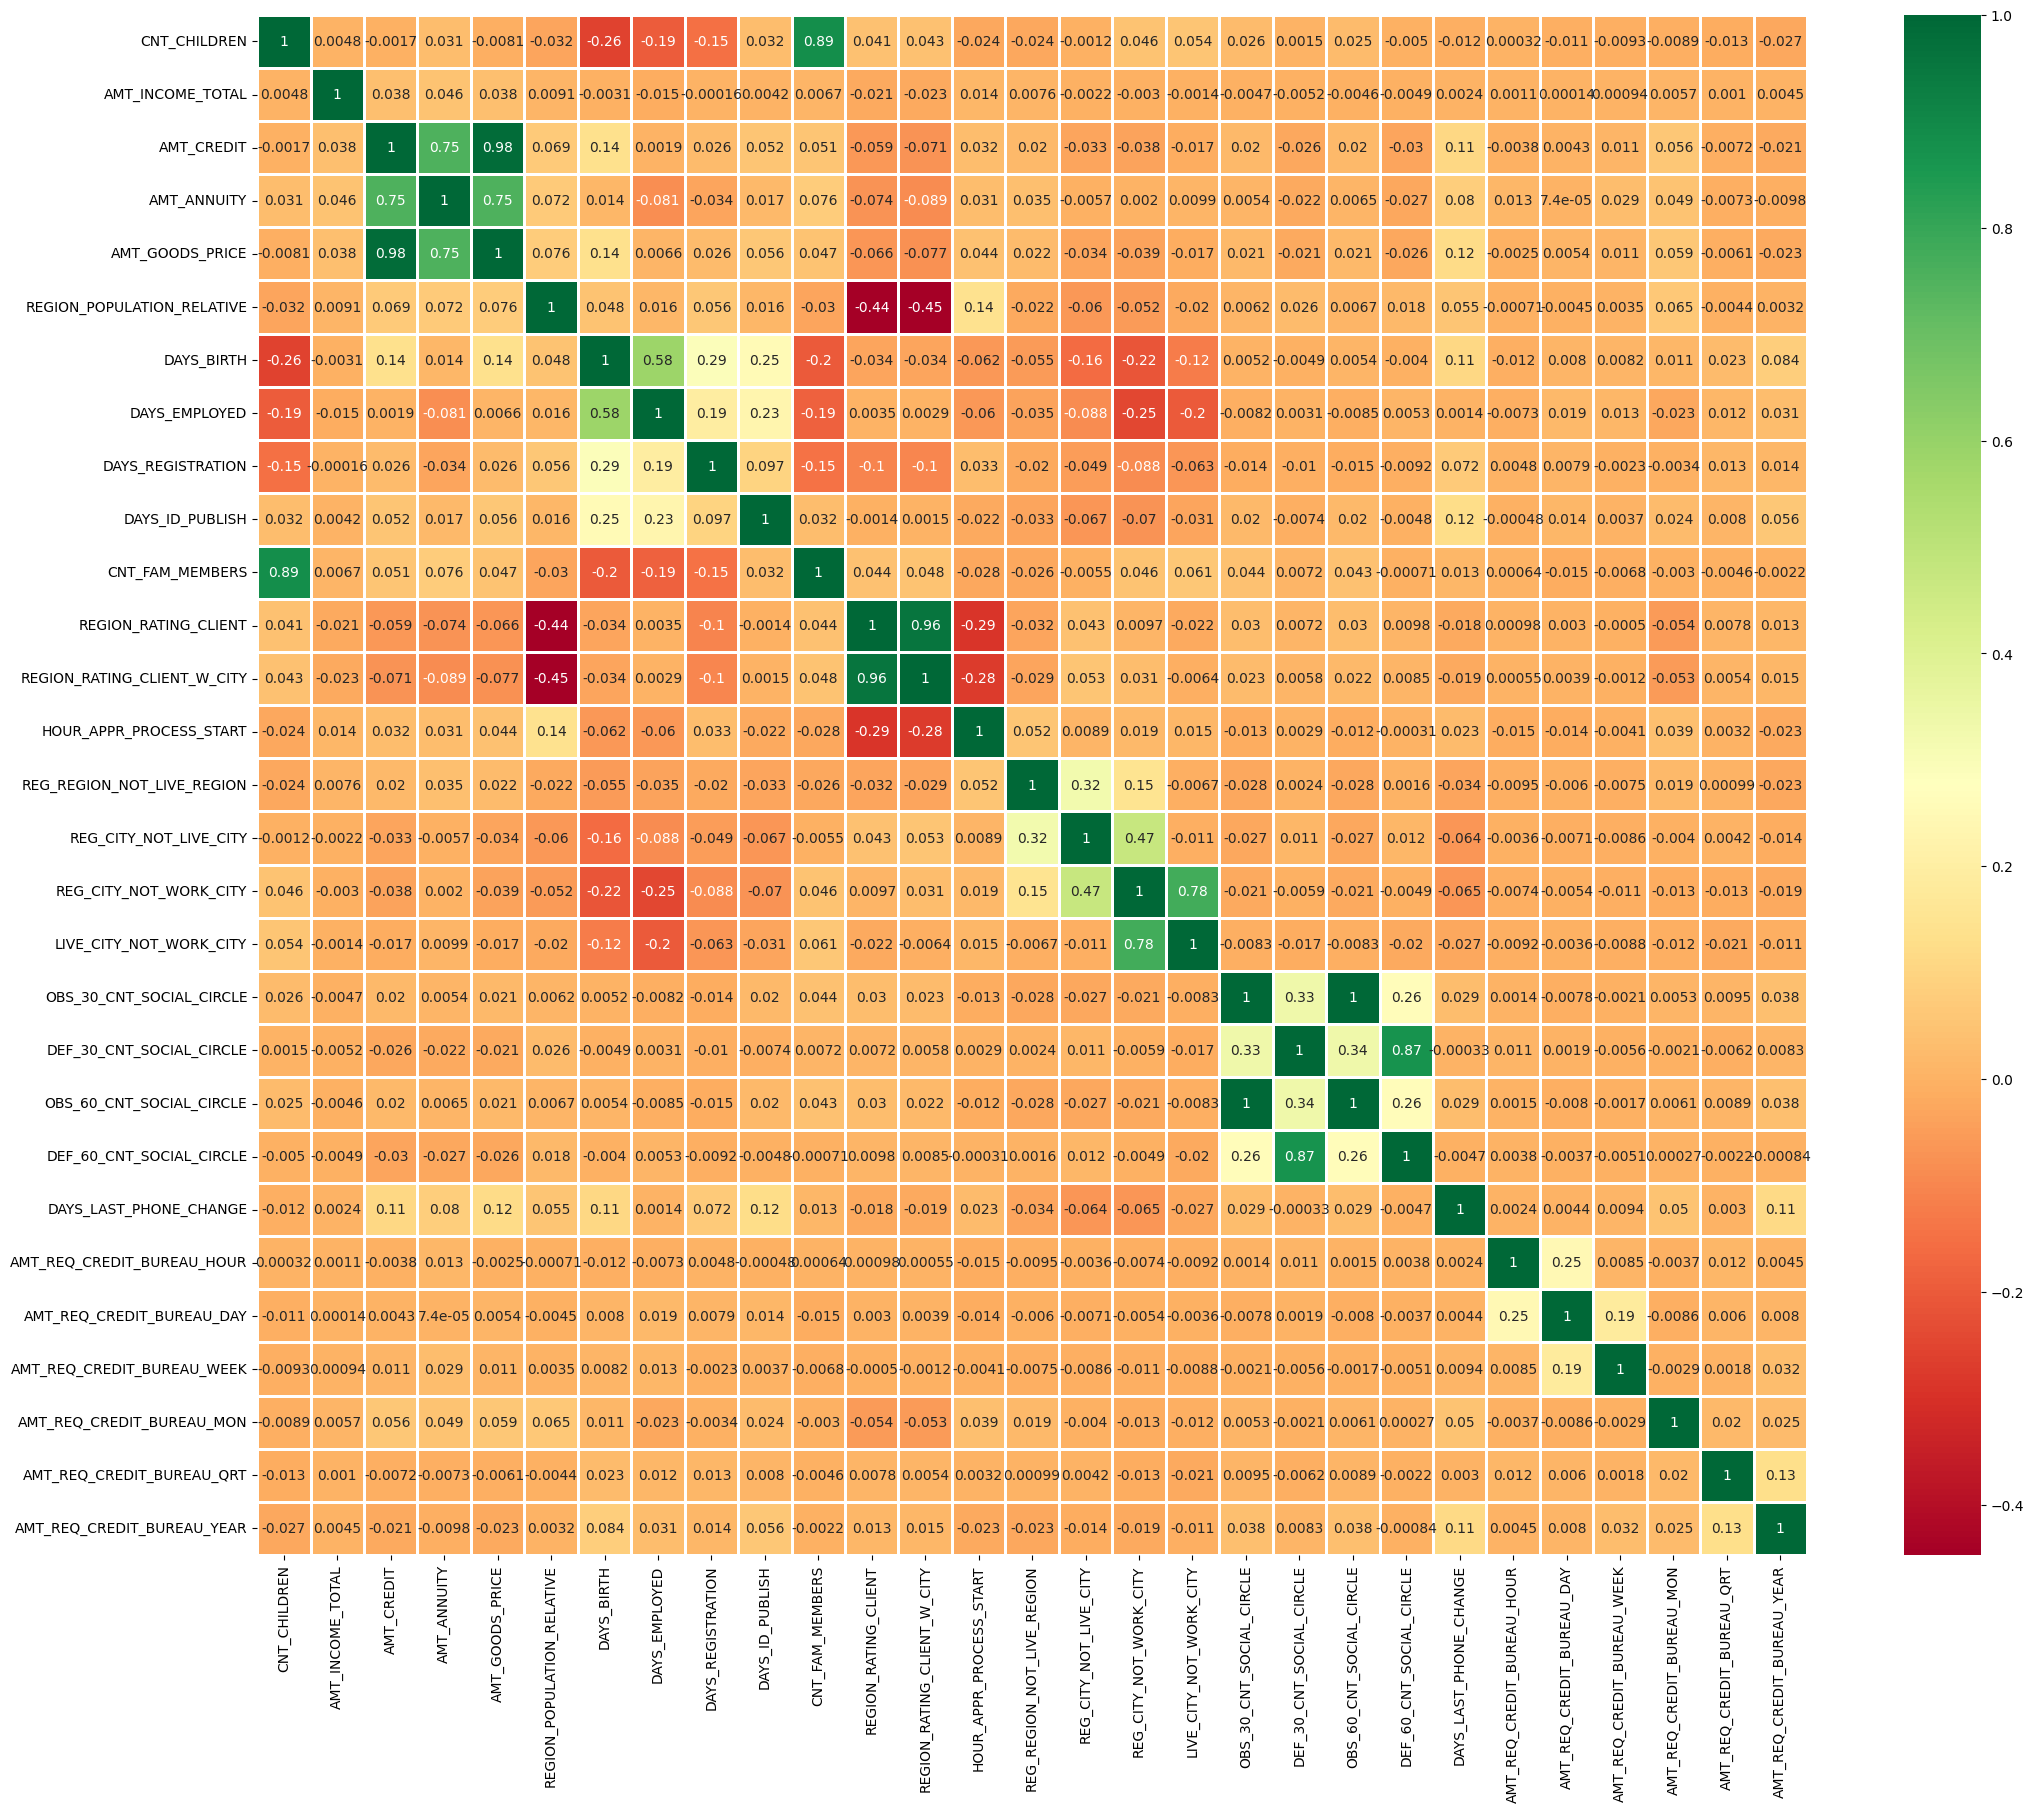

In [162]:
# Plotting heatmao to visualise correlation among repyers
fig = plt.figure(figsize=(25,20))
ax = sns.heatmap(target_1_col.corr(), cmap="RdYlGn",annot=True,linewidth =1)

###### Insights:
- Amount credit is highly correlated with goods price,and amount annuity.
- Days of birth and days of employed are also correlated with each other.
- There are few changes in relationship among variables as compared to repayer.

(0.0, 4250074.05)

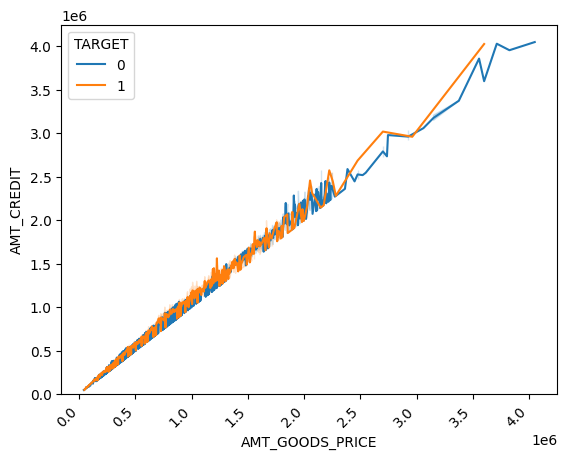

In [165]:
# Numerical Bivariate analysis
sns.lineplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",hue="TARGET",data=inp0)
plt.xticks(rotation=45, ha='right')
plt.ylim(0,)

###### Insights:
- As credit amount increases more than 25 lakhs defalter rate also increase.It shows that amount of loan affects the repayment of loan.

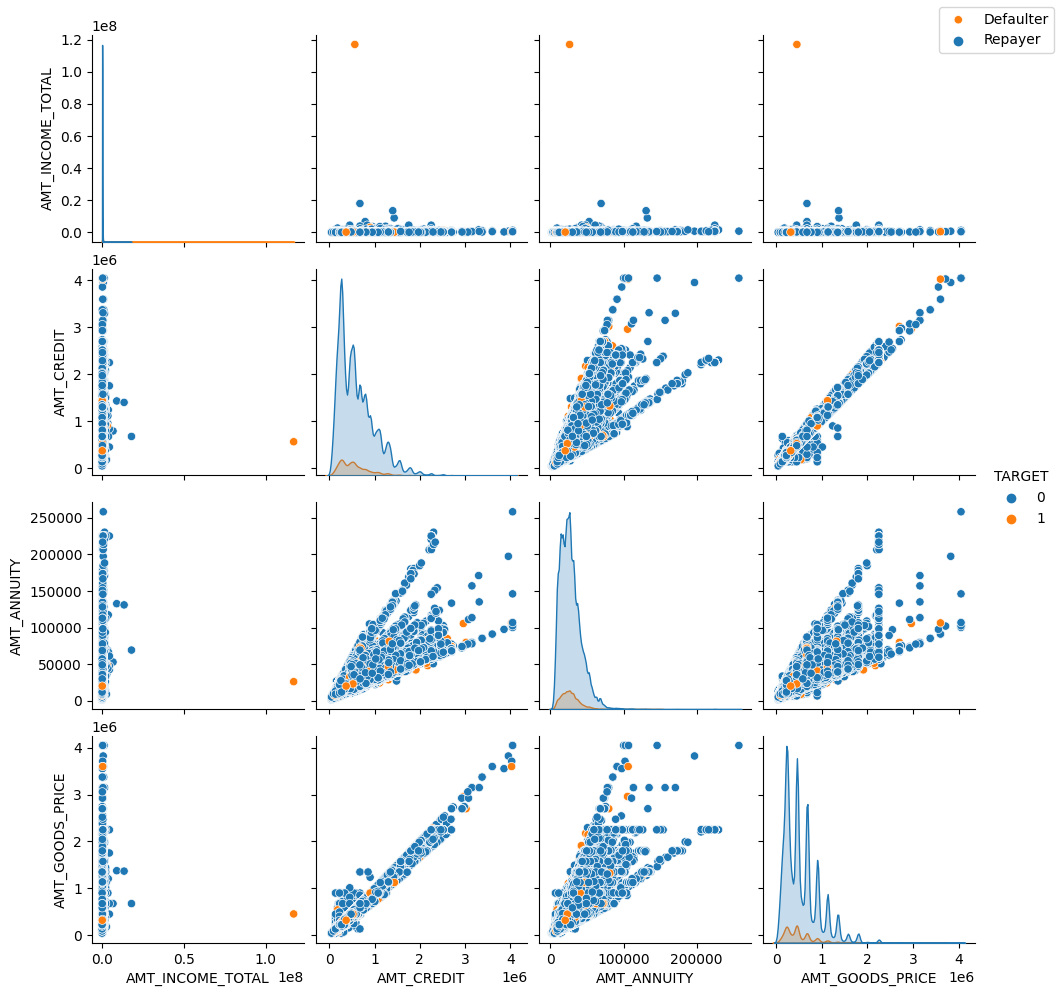

In [166]:
#pair plot among variables for analysis
AMT_1 = inp0[[ "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", "AMT_GOODS_PRICE","TARGET"]]
AMT_1 = AMT_1[(AMT_1["AMT_GOODS_PRICE"].notnull()) & (AMT_1["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(AMT_1,hue="TARGET")
ax.fig.legend(labels=["Defaulter","Repayer"])
plt.show()

###### Insights:
- Amount credit and goods price are highly correlated as scatter chart form a line.
- Very few defaulter are available when amount credit is more than 15 Lakhs.


### Analysis of merged data


In [167]:
# Merge both the data 
inp = pd.merge(inp0, inp1, how="left", on="SK_ID_CURR")
inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_APPLICATION_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,Medium
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,Very Low
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0,Very Low


In [168]:
# Checking the size of merged data
inp.shape

(1430155, 88)

In [169]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 88 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  category
 3   CODE_GENDER                  1430155 non-null  category
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  category
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430155 non-null  float64 
 10  AMT_GOODS_PRICE_x            1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x            1430155 non-null  category
 12  NAME_INCOME_TYPE            

In [170]:
#for identifying correlation and analysis -bisecting merged data-
#Repayers
inp_t0=inp[inp["TARGET"]==0]
#Defaulders
inp_t1=inp[inp["TARGET"]==1]

(0.0, 427471.45978118)

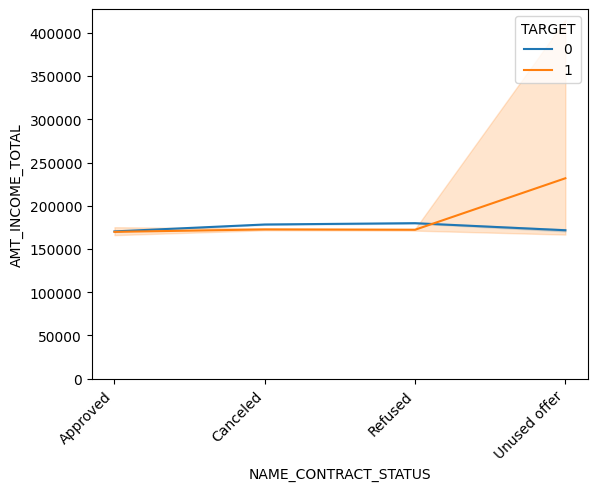

In [172]:
#Plotting relationship between Contract status and Total income
sns.lineplot(x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL",hue="TARGET",data=inp)
plt.xticks(rotation=45, ha="right")
plt.ylim(0,)

###### Insights:
- People who have unused loan offer are defaulted in high number within average income.


(0.0, 0.23162022415373001)

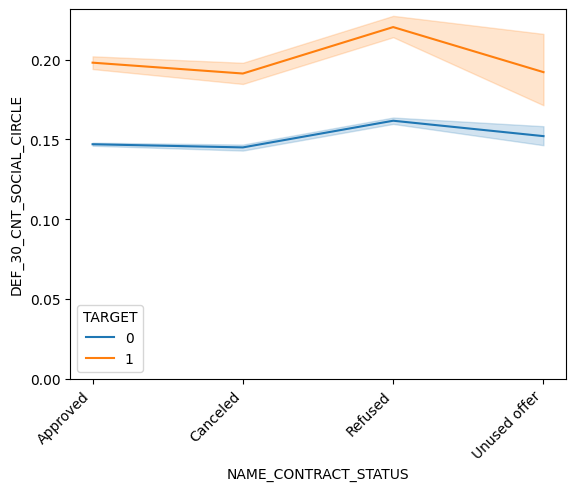

In [174]:
#Plotting relationship between people defaulted in last 30days and Contract status

sns.lineplot(x="NAME_CONTRACT_STATUS",y="DEF_30_CNT_SOCIAL_CIRCLE",hue="TARGET",data=inp)
plt.xticks(rotation=45, ha="right")
plt.ylim(0,)

###### Insights:
- The number of defaultees in last 30 days in CNT SOCIAL CIRCLE are higher though previously bank has rejected their loan.

## Conclusions:



1.An applicant may be Repayer can be analysed with following insights.

- Age between 30-40 are highest repayer of loan.
- Employment years between 0-5 are highest repayer.
- Low credit range between 40,000 to 80,000 are highest repayer.
- Cash loans are very huge part of total loans.
- Female clients are highest repayer almost double than male clients.
- Labourers and Sales staff are highest applicants of loan and defaultees too.

2.Applicant may be Repayer can be analysed with following insights.

- With increasing age and employment years defaluter are decreases.
- Medium credit range is including highest defaulters 
- Very few clients are defalutees in revolving loans.
- Males cliens have highest chances to being a defaulter.

3.Bank can follow reject or can approve loan with higher intersts by considering following conclusion.

- Commercial associate, state servant, working 's defaulter rate is higher in the given data.
- Married people are applying for loans more as compare to others.
- Males clients have a highest chances to being a defaulter.
- People having more than 3 children are consisting high default rate.
- People who lived in a rented house are higher as compare to people lived in their own houses -so chances of defaultees are higher.

